In [1]:
#import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Integration

## 1.1 Loading and cleaning Transfermarkt data

Data were scraped from Transfermarkt using the scraper in "Scraper" folder. We scraped the pages of La Liga relevant teams for the given seasons, parsed them and extracted all necessary information. We then saved the data as a JSON file.

In [2]:
#load scraped data stored in a json file
df = pd.read_json('Scraper/players_info.json', encoding='latin_1')
df.head()

,club,season,player_name,player_position,date_of_birth,player_country,player_height,market_value
0,Atlético de Madrid,2010,"[David de Gea, Sergio Asenjo, Joel Robles, Iag...","[Goalkeeper, Goalkeeper, Goalkeeper, Goalkeepe...","[1990-11-07, 1989-06-28, 1990-06-17, 1988-01-2...","[Spain, Spain, Spain, Spain, Uruguay, Spain, S...","[1.89, 1.89, 1.97, 1.87, 1.87, , 1.89, , 1.80,...","[12000000, 5000000, 1000000, , 12000000, 90000..."
1,Atlético de Madrid,2012,"[Thibaut Courtois, Sergio Asenjo, Joel Robles,...","[Goalkeeper, Goalkeeper, Goalkeeper, Centre-Ba...","[1992-05-11, 1989-06-28, 1990-06-17, 1986-02-1...","[Belgium, Spain, Spain, Uruguay, Brazil, Spain...","[2.00, 1.89, 1.97, 1.87, 1.86, 1.89, 1.81, 1.8...","[18000000, 2500000, 2000000, 18000000, 1400000..."
2,Atlético de Madrid,2014,"[Jan Oblak, Miguel Ángel Moyá, Bernabé Barragá...","[Goalkeeper, Goalkeeper, Goalkeeper, Centre-Ba...","[1993-01-07, 1984-04-02, 1993-02-18, 1986-02-1...","[Slovenia, Spain, Spain, Uruguay, Brazil, Urug...","[1.88, 1.89, 1.90, 1.87, 1.86, 1.85, 1.89, 1.8...","[8000000, 7000000, , 30000000, 22000000, 15000..."
3,Atlético de Madrid,2013,"[Thibaut Courtois, Daniel Aranzubia, Yassine B...","[Goalkeeper, Goalkeeper, Goalkeeper, Goalkeepe...","[1992-05-11, 1979-09-18, 1991-04-05, 1994-01-1...","[Belgium, Spain, Morocco, Spain, Uruguay, Braz...","[2.00, 1.84, 1.92, 1.86, 1.87, 1.86, 1.89, 1.8...","[25000000, 1000000, 300000, , 20000000, 150000..."
4,Atlético de Madrid,2011,"[Thibaut Courtois, Sergio Asenjo, Joel Robles,...","[Goalkeeper, Goalkeeper, Goalkeeper, Centre-Ba...","[1992-05-11, 1989-06-28, 1990-06-17, 1986-02-1...","[Belgium, Spain, Spain, Uruguay, Spain, Brazil...","[2.00, 1.89, 1.97, 1.87, , 1.86, 1.89, 1.80, 1...","[9000000, 2000000, 2000000, 12000000, 8000000,..."


In [3]:
#transform data so that we have a single line for each player and season
df1 = df.explode(['player_name', 'player_position', 'date_of_birth', 'player_country', 'player_height',	'market_value']).reset_index(drop=True)
df1.head(20)

,club,season,player_name,player_position,date_of_birth,player_country,player_height,market_value
0,Atlético de Madrid,2010,David de Gea,Goalkeeper,1990-11-07,Spain,1.89,12000000
1,Atlético de Madrid,2010,Sergio Asenjo,Goalkeeper,1989-06-28,Spain,1.89,5000000
2,Atlético de Madrid,2010,Joel Robles,Goalkeeper,1990-06-17,Spain,1.97,1000000
3,Atlético de Madrid,2010,Iago Herrerín,Goalkeeper,1988-01-25,Spain,1.87,
4,Atlético de Madrid,2010,Diego Godín,Centre-Back,1986-02-16,Uruguay,1.87,12000000
5,Atlético de Madrid,2010,Álvaro Domínguez,Centre-Back,1989-05-16,Spain,,9000000
6,Atlético de Madrid,2010,Mario Suárez,Centre-Back,1987-02-24,Spain,1.89,4000000
7,Atlético de Madrid,2010,Tomas Ujfalusi,Centre-Back,1978-03-24,Czech Republic,,3500000
8,Atlético de Madrid,2010,Luis Amaranto Perea,Centre-Back,1979-01-30,Colombia,1.80,3000000
9,Atlético de Madrid,2010,Juanito,Centre-Back,1976-07-23,Spain,,900000


In [4]:
#number of (player, season) combinations
df1.shape[0]

13679

In [5]:
#dataframe columns data type
df1.dtypes

club               object
season              int64
player_name        object
player_position    object
date_of_birth      object
player_country     object
player_height      object
market_value       object
dtype: object

In [6]:
#convert season to'2010-2011' format
df1['season'] = df1['season'].astype(str) + '-' + (df1['season'] + 1).astype(str)

In [7]:
#check season values
np.sort(df1['season'].unique())

array(['2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015',
       '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020',
       '2020-2021', '2021-2022'], dtype=object)

In [8]:
#change date_of_birth to datetime
df1['date_of_birth'] = pd.to_datetime(df1['date_of_birth'])

In [9]:
#check unique values of player_height
df1['player_height'].unique()

array(['1.89', '1.97', '1.87', '', '1.80', '1.86', '1.82', '1.76', '1.81',
       '1.84', '1.73', '1.83', '1.74', '1.75', '2.00', '1.78', '1.70',
       '1.77', '1.88', '1.90', '1.85', '1.71', '1.92', '1.79', '1.91',
       '1.72', '1.94', '1.95', '1.66', '1.63', '1.69', '1.67', '1.93',
       '1.64', '1.96', '1.68', '1.65', '1.98', '2.02', '1.62', '2.03',
       '1 83', '1.61', '1.8', '1.60', '1´82'], dtype=object)

In [10]:
#clean and transform player_height
df1['player_height'] = df1['player_height'].str.replace('´','.')
df1['player_height'] = df1['player_height'].str.replace(' ','.')
df1['player_height'] = df1['player_height'].replace('', np.nan)
df1['player_height'] = df1['player_height'].astype(float)

In [11]:
#clean and transform market_value
df1['market_value'] = df1['market_value'].replace('',np.nan)
df1['market_value'] = df1['market_value'].astype(float)

In [12]:
#check club names values
df1['club'].unique()

array(['Atlético de Madrid', 'FC Barcelona', 'Real Zaragoza',
       'Real Betis Balompié', 'RCD Mallorca', 'CA Osasuna',
       'Real Valladolid CF', 'Rayo Vallecano', 'Sevilla FC',
       'Real Madrid', 'UD Las Palmas', 'Athletic Bilbao',
       'Racing Santander', 'Real Sociedad', 'RCD Espanyol Barcelona',
       'Deportivo de La Coruña', 'Celta de Vigo', 'Córdoba CF',
       'Valencia CF', 'Villarreal CF', 'Málaga CF', 'Deportivo Alavés',
       'CD Leganés', 'Elche CF', 'SD Eibar', 'Sporting Gijón', 'Cádiz CF',
       'UD Almería', 'Levante UD', 'Getafe CF', 'SD Huesca',
       'Hércules CF', 'Girona FC', 'Granada CF'], dtype=object)

34 different clubs played in La Liga between 2010-2011 and 2021-2022

In [13]:
#check player_position values
df1['player_position'].unique()

array(['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back',
       'Defensive Midfield', 'Central Midfield', 'Attacking Midfield',
       'Left Winger', 'Right Winger', 'Centre-Forward', 'Right Midfield',
       'Second Striker', 'Left Midfield', 'Defence', 'Midfield', 'Attack'],
      dtype=object)

For some players, there is no exact position, let's discover how many

In [14]:
df1[df1['player_position'] == 'Defence']

,club,season,player_name,player_position,date_of_birth,player_country,player_height,market_value
2587,RCD Mallorca,2021-2022,Marcos Fernández,Defence,2003-07-17,Spain,NaN,NaN
3971,UD Las Palmas,2010-2011,Israel García,Defence,1988-12-09,Spain,NaN,NaN
7638,Villarreal CF,2011-2012,José Manuel Catalá,Defence,1985-01-01,Spain,1.82,2500000.0
7673,Villarreal CF,2010-2011,José Manuel Catalá,Defence,1985-01-01,Spain,1.82,1500000.0
8777,CD Leganés,2010-2011,Marco García,Defence,1990-02-15,Spain,NaN,NaN
8778,CD Leganés,2010-2011,Diego García,Defence,1992-08-31,Spain,NaN,NaN
10845,Cádiz CF,2013-2014,Juan Carlos Ceballos,Defence,1983-04-07,Spain,1.77,NaN
11861,Getafe CF,2021-2022,Pablo Montero,Defence,2002-05-09,Spain,1.68,NaN
12199,SD Huesca,2020-2021,Jorge Cofrades,Defence,2001-01-19,Spain,1.85,NaN


In [15]:
df1[df1['player_position'] == 'Midfield']

,club,season,player_name,player_position,date_of_birth,player_country,player_height,market_value
6007,Deportivo de La Coruña,2013-2014,Sérgio Teles,Midfield,1993-03-30,Portugal,1.77,NaN
6821,Córdoba CF,2011-2012,Juanje,Midfield,1992-07-05,Spain,NaN,NaN
8775,CD Leganés,2010-2011,Guille,Midfield,1992-02-19,Spain,NaN,NaN
8917,Deportivo Alavés,2014-2015,Andoni Benito,Midfield,1993-04-13,Spain,NaN,NaN
10731,UD Almería,2011-2012,Verza,Midfield,1986-09-29,Spain,1.81,1200000.0
10879,UD Almería,2017-2018,Verza,Midfield,1986-09-29,Spain,1.81,600000.0
10979,UD Almería,2014-2015,Verza,Midfield,1986-09-29,Spain,1.81,3500000.0
11213,Levante UD,2015-2016,Verza,Midfield,1986-09-29,Spain,1.81,3000000.0
11244,Levante UD,2016-2017,Verza,Midfield,1986-09-29,Spain,1.81,1200000.0
11273,UD Almería,2013-2014,Verza,Midfield,1986-09-29,Spain,1.81,2500000.0


In [16]:
df1[df1['player_position'] == 'Attack']

,club,season,player_name,player_position,date_of_birth,player_country,player_height,market_value
6357,Deportivo de La Coruña,2020-2021,Hugo Padín,Attack,2003-10-26,Spain,NaN,NaN
6820,Córdoba CF,2011-2012,Javi López,Attack,1990-10-16,Spain,1.90,NaN
7799,Villarreal CF,2012-2013,Salva Chamorro,Attack,1990-05-08,Spain,1.89,NaN
8776,CD Leganés,2010-2011,Daniel Guzmán,Attack,1992-02-11,Spain,NaN,NaN
9051,CD Leganés,2013-2014,Gustavo Coelho Souza da Conceicao,Attack,1993-05-07,Brazil,1.75,NaN
9861,SD Eibar,2013-2014,Lander Hortelano,Attack,1995-05-13,Spain,NaN,NaN
11274,UD Almería,2013-2014,Kiu,Attack,1995-01-04,"Korea, South",1.66,300000.0
12673,Girona FC,2011-2012,Gerard Muñoz,Attack,1993-02-22,Spain,1.82,NaN
12998,Girona FC,2020-2021,Jandro,Attack,2001-03-21,Spain,NaN,NaN
13648,Girona FC,2013-2014,Gerard Muñoz,Attack,1993-02-22,Spain,1.82,NaN


In [17]:
#replace dataframe player_position values with acronyms
positions_dict = {'Goalkeeper': 'GK', 'Centre-Back': 'CB', 'Left-Back': 'LB', 'Right-Back': 'RB', 'Defensive Midfield': 'DM', 'Central Midfield': 'CM', 'Attacking Midfield': 'AM', 'Left Midfield': 'LM', 'Right Midfield': 'RM', 'Left Winger': 'LW', 'Right Winger': 'RW', 'Centre-Forward': 'CF', 'Second Striker': 'SS', 'Defence': 'DF', 'Midfield': 'MF', 'Attack': 'FW'}
df1['player_position'] = df1['player_position'].map(positions_dict)

In [18]:
#add year_of_birth column
df1['year_of_birth'] = df1['date_of_birth'].dt.year

In [19]:
#view data after cleaning and transforming
df1[df1['player_name'] == 'Yassine Bounou']

,club,season,player_name,player_position,date_of_birth,player_country,player_height,market_value,year_of_birth
97,Atlético de Madrid,2013-2014,Yassine Bounou,GK,1991-04-05,Morocco,1.92,300000.0,1991
974,Real Zaragoza,2014-2015,Yassine Bounou,GK,1991-04-05,Morocco,1.92,300000.0,1991
1008,Real Zaragoza,2015-2016,Yassine Bounou,GK,1991-04-05,Morocco,1.92,600000.0,1991
3502,Sevilla FC,2019-2020,Yassine Bounou,GK,1991-04-05,Morocco,1.92,4000000.0,1991
3568,Sevilla FC,2021-2022,Yassine Bounou,GK,1991-04-05,Morocco,1.92,18000000.0,1991
3897,Sevilla FC,2020-2021,Yassine Bounou,GK,1991-04-05,Morocco,1.92,18000000.0,1991
12872,Girona FC,2017-2018,Yassine Bounou,GK,1991-04-05,Morocco,1.92,3000000.0,1991
12902,Girona FC,2018-2019,Yassine Bounou,GK,1991-04-05,Morocco,1.92,5000000.0,1991
12935,Girona FC,2019-2020,Yassine Bounou,GK,1991-04-05,Morocco,1.92,4000000.0,1991
13267,Girona FC,2016-2017,Yassine Bounou,GK,1991-04-05,Morocco,1.92,1000000.0,1991


## 1.2 Read and merge players statistics data

Player statistics data downloaded from FBREF are located in folders named to each statistics type (general, defense, attack, passing, goalkeeping, other). Each folder contains CSV files that are named after the seasons. That means the files are organized as follows:
  -  Players Standard
     2010-2011
     2011-2012
     ...
     2021-2022
  -  Players Attack
     2010-2011
     ...
     2021-2022
  -  Players Defence
  -  ...

We merge player statistics data with Transfermarkt data to add players' market value in each season to players' statistics data. One issue raises regarding this task, player names from the two sources are not always spelled the same. We use fuzzy matching to merge the tables. Still, fuzzy matching is not perfect especially given the existence of non-Latin letters for many players in one of the sources. Also, some player names are far different (sometimes the player nickname is used instead of the full name in one of the sources). In these cases, we manually changed the player names in one of the sources to allow matching.
These are examples of differences in names between the sources:
  -  Player full name: Christian Fernandez Salas
     Name in FBREF: Christian
     Name in Transfermarkt: Bolaño
  -  Player full name: José Ángel Valdez Díaz
     Name in FBREF: José Ángel
     Name in Transfermarkt: Cote
  -  Player full name: Jesús Manuel Corona
     Name in FBREF: Jesús Corona
     Name in Transfermarkt: Tecatito

In [46]:
#generate season names as a list from 2010-2011 to 2021-2022
seasons = [str(i) + '-' + str(i+1) for i in range(2010, 2022)]

In [4]:
#don't show error warnings (we did nott disable the warnings until we finished the analysis so that we do not miss any important ones)
import warnings
warnings.filterwarnings('ignore')

In [5]:
#import algorithms used for fuzzy matching
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [22]:
#list to store for each season players information and players statistics, respectively
players_info = []
players_stats = []
#combine player statistics so that we have a dataframe for each season
for index, season in enumerate(seasons):
    #read players_general_stats file
    players_general_stats = pd.read_csv('Players Stats/Players Standard/' + season + '.csv',  skiprows=1,
                    usecols=['Player', 'Squad', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'CrdY', 'CrdR'], encoding='latin_1')
    #give clearer names to the columns
    players_general_stats.rename(columns={'Player': 'player', 'Squad': 'team_name', 'MP': 'matches_played',
                                         'Starts': 'starts', 'Min': 'minutes_played', 'Gls': 'goals', 'Ast': 'assists',
                                         'PK': 'penalties_scored', 'PKatt': 'penalties_attempted',
                                         'CrdY': 'yellow_cards', 'CrdR': 'red_cards'}, inplace=True)
    #convert minutes_played column to int
    players_general_stats['minutes_played'] = players_general_stats['minutes_played'].str.replace(',', '')
    players_general_stats['minutes_played'] = players_general_stats['minutes_played'].replace('', 0)
    players_general_stats['minutes_played'] = players_general_stats['minutes_played'].astype(int)

    #add the other statistics to the dataframe
    #read players_attack_stats file
    players_attack_stats = pd.read_csv('Players Stats/Players Attack/' + season + '.csv',  skiprows=1,
                    usecols=['Player', 'Squad', 'Sh', 'SoT', 'Dist'], encoding='latin_1')
    #give clearer names to the columns
    players_attack_stats.rename(columns={'Player': 'player_a', 'Squad': 'team_name_a', 'Sh': 'shots',
                                         'SoT': 'shots_on_target', 'Dist': 'shoot_avg_distance'}, inplace=True)
    #merge attack stats with general stats
    players_season_stats = players_general_stats.merge(players_attack_stats, left_on=['player', 'team_name'], right_on=['player_a', 'team_name_a'], how='left').drop(['player_a', 'team_name_a'], axis=1)

    #data for defense, passing, and other stats are not available for seasons prior to 2017-2018, for these seasons we do nothing
    if index >= seasons.index('2017-2018'):
        #read players_passing_stats file
        players_passing_stats = pd.read_csv('Players Stats/Players Passing/' + season + '.csv',  skiprows=1,
                                            usecols=['Player', 'Squad', 'Cmp', 'Att'], encoding='latin_1')
        #give clearer names to the columns
        players_passing_stats.rename(columns={'Player': 'player_p', 'Squad': 'team_name_p', 'Cmp': 'pass_completed',
                                              'Att': 'pass_attempted'}, inplace=True)
        #read players_defense_stats file
        players_defense_stats = pd.read_csv('Players Stats/Players Defense/' + season + '.csv',  skiprows=1,
                                            usecols=['Player', 'Squad', 'TklW', 'Blocks', 'Int'], encoding='latin_1')
        #give clearer and consistent names to the columns
        players_defense_stats.rename(columns={'Player': 'player_d', 'Squad': 'team_name_d', 'TklW': 'tackles_won',
                                         'Blocks': 'blocks', 'Int': 'interceptions'}, inplace=True)
        #read players_other_stats file
        players_other_stats = pd.read_csv('Players Stats/Players Other/' + season + '.csv',  skiprows=1,
                                          usecols=['Player', 'Squad', 'Fls', 'Fld', 'Off', 'Crs', 'Won', 'Lost'], encoding='latin_1')
        #give clearer names to the columns
        players_other_stats.rename(columns={'Player': 'player_o', 'Squad': 'team_name_o', 'Fls': 'fouls_committed',
                                         'Fld': 'fouls_drawn', 'Off': 'offsides', 'Crs': 'crosses',
                                         'Won': 'aerials_won', 'Lost': 'aerials_lost'}, inplace=True)
        #merge players_season_stats with players_defense_stats, players_goalkeeping_stats, and players_misc_stats
        players_season_stats = players_season_stats.merge(players_defense_stats, left_on=['player', 'team_name'], right_on=['player_d', 'team_name_d'], how='left').drop(['player_d', 'team_name_d'], axis=1)
        players_season_stats = players_season_stats.merge(players_passing_stats, left_on=['player', 'team_name'], right_on=['player_p', 'team_name_p'], how='left').drop(['player_p', 'team_name_p'], axis=1)
        players_season_stats = players_season_stats.merge(players_other_stats, left_on=['player', 'team_name'], right_on=['player_o', 'team_name_o'], how='left').drop(['player_o', 'team_name_o'], axis=1)
    else:
        pass
    #read players_goalkeeping_stats file
    players_goalkeeping_stats = pd.read_csv('Players Stats/Players Goalkeeping/' + season + '.csv',  skiprows=1,
                    usecols=['Player', 'Squad', 'GA', 'SoTA', 'Saves', 'CS', 'PKA', 'PKsv', 'PKm'], encoding='latin_1')
    #give clearer names to the columns
    players_goalkeeping_stats.rename(columns={'Player': 'player_g', 'Squad': 'team_name_g', 'GA': 'goals_against',
                                         'SoTA': 'shots_on_target_against', 'Saves': 'saves', 'CS': 'clean_sheets',
                                         'PKA': 'penalties_scored_against', 'PKsv': 'penalties_saved', 'PKm': 'penalties_missed'}, inplace=True)
    players_season_stats = players_season_stats.merge(players_goalkeeping_stats, left_on=['player', 'team_name'], right_on=['player_g', 'team_name_g'], how='left').drop(['player_g', 'team_name_g'], axis=1)

    #merge player statistics with Transfermarkt data to join market value to players statistics
    #subset Transfermarkt data by season
    players_info_season = df1[df1['season'] == season]

    #Important: after testing the fuzzy matching using fuzz.token_sort_ratio score, we found that
    #             the algorithm couldn't find all matches (in addition to the constraint mentioned previously,
    #             some players have only the first or last name in one of the sources). To remedy this issue,
    #             we did also fuzzy matching with fuzz.token_set_ratio score so that if a matching name is not found
    #             using the first method, the matching name if found by the second method is used

    #fuzzy matching using fuzz.token_sort_ratio score
    #copy the dataframes to do the merging
    dframe1 = players_season_stats.copy()
    dframe2 = players_info_season.copy()
    #empty lists for storing the matches later
    mat1 = []
    mat2 = []
    p = []
    #convert dataframe columns to match to lists of elements to do fuzzy matching
    list1 = dframe1['player'].apply(str).tolist()
    list2 = dframe2['player_name'].apply(str).tolist()
    #take the threshold as 85
    threshold = 85
    #iterate through list1 to extract its closest match from list2
    for i in list1:
      mat1.append(process.extractOne(i, list2, scorer=fuzz.token_sort_ratio))
    dframe1['matches'] = mat1
    #iterate through the closest matches to filter out the closest match
    for j in dframe1['matches']:
        if j[1] >= threshold:
            p.append(j[0])
        mat2.append(",".join(p))
        p = []
    #store the resultant matches back in dframe1
    dframe1['matches'] = mat2

    #fuzzy matching using fuzz.token_set_ratio score
    #empty lists for storing the matches later
    mat3 = []
    mat4 = []
    p2 = []
    #convert dataframe columns to match to lists of elements to do fuzzy matching
    list3 = dframe1['player'].apply(str).tolist()
    list4 = dframe2['player_name'].apply(str).tolist()
    #iterate through list3 to extract its closest match from list4
    for i in list3:
        mat3.append(process.extractOne(i, list4, scorer=fuzz.token_set_ratio))
    dframe1['matches2'] = mat3
    #iterate through the closest matches to filter out the closest match
    for j in dframe1['matches2']:
        if j[1] >= threshold:
            p2.append(j[0])
        mat4.append(",".join(p2))
        p2 = []
    #store the resultant matches back in dframe1
    dframe1['matches2'] = mat4

    #if there is no matching using the first method, use the result of the second method
    dframe1['player_matched'] = np.where(dframe1['matches'] == '', dframe1['matches2'], dframe1['matches'])

    #add market_value column to dframe1
    player_full = dframe1.merge(players_info_season, left_on='player_matched', right_on='player_name', how='left')

    #use a list to store dataframes of players information
    players_info.append(player_full[['player', 'season',	'team_name', 'player_position', 'date_of_birth',
                                     'player_country', 'player_height']])

    #use a list to store dataframes of players statistics of each season
    players_all_stats = player_full.drop(['matches', 'matches2', 'player_matched', 'club', 'player_name', 'player_position', 'date_of_birth', 'player_country', 'player_height'], axis=1)

    players_stats.append(players_all_stats)

In [23]:
#show parts of data
players_info[0].head(10)

,player,season,team_name,player_position,date_of_birth,player_country,player_height
0,Sergio Abad Beyxer,2010-2011,Levante,CM,1976-11-10,Spain,1.82
1,Damià Abella,2010-2011,Osasuna,RB,1982-04-15,Spain,1.88
2,Éric Abidal,2010-2011,Barcelona,LB,1979-09-11,France,1.86
3,Santiago Acasiete,2010-2011,Almería,CB,1977-11-22,Peru,1.82
4,Lautaro Acosta,2010-2011,Sevilla,LW,1988-03-14,Argentina,1.69
5,Antonio Adán,2010-2011,Real Madrid,GK,1987-05-13,Spain,1.90
6,Emmanuel Adebayor,2010-2011,Real Madrid,CF,1984-02-26,Togo,1.92
7,Adriano,2010-2011,Barcelona,LB,1984-10-26,Brazil,1.72
8,Aritz Aduriz,2010-2011,Valencia,CF,1981-02-11,Spain,1.81
9,Ibrahim Afellay,2010-2011,Barcelona,AM,1986-04-02,Netherlands,1.81


In [24]:
players_info[11].head(10)

,player,season,team_name,player_position,date_of_birth,player_country,player_height
0,Luis Abram,2021-2022,Granada,CB,1996-02-27,Peru,1.81
1,Marcos Acuña,2021-2022,Sevilla,LB,1991-10-28,Argentina,1.72
2,Martin Agirregabiria,2021-2022,Alavés,RB,1996-05-10,Spain,1.80
3,Julen Agirrezabala,2021-2022,Athletic Club,GK,2000-12-26,Spain,1.87
4,Sergio Agüero,2021-2022,Barcelona,CF,1988-06-02,Argentina,1.73
5,Álvaro Aguirre,2021-2022,Rayo Vallecano,LW,2000-02-03,Spain,NaN
6,Joseph Aidoo,2021-2022,Celta Vigo,CB,1995-09-29,Ghana,1.77
7,Carlos Akapo,2021-2022,Cádiz,RB,1993-03-12,Equatorial Guinea,1.79
8,Ilias Akhomach,2021-2022,Barcelona,RW,2004-04-16,Spain,1.75
9,Paul Akouokou,2021-2022,Betis,DM,1997-12-20,Cote d'Ivoire,1.81


In [25]:
players_stats[1].head(10)

,player,team_name,matches_played,starts,minutes_played,goals,assists,penalties_scored,penalties_attempted,yellow_cards,...,goals_against,shots_on_target_against,saves,clean_sheets,penalties_scored_against,penalties_saved,penalties_missed,season,market_value,year_of_birth
0,Damià Abella,Osasuna,30,24,2255,0,0,0,0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-2012,2000000.0,1982
1,Éric Abidal,Barcelona,22,20,1762,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-2012,10000000.0,1979
2,Lautaro Acosta,Racing Sant,21,14,1259,2,0,0,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-2012,1200000.0,1988
3,Antonio Adán,Real Madrid,1,1,90,0,0,0,0,0,...,1.0,6.0,5.0,0.0,NaN,NaN,NaN,2011-2012,1000000.0,1987
4,Adriano,Barcelona,26,20,1722,1,4,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-2012,14000000.0,1984
5,Aritz Aduriz,Valencia,29,11,1302,7,1,0,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-2012,4000000.0,1981
6,Ibrahim Afellay,Barcelona,4,1,116,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-2012,10000000.0,1986
7,Imanol Agirretxe,Real Sociedad,36,27,2183,10,3,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-2012,3000000.0,1987
8,Jordi Alba,Valencia,32,27,2543,2,5,0,0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-2012,10000000.0,1989
9,David Albelda,Valencia,21,19,1586,0,0,0,0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-2012,2000000.0,1977


In [26]:
players_stats[9].head(10)

,player,team_name,matches_played,starts,minutes_played,goals,assists,penalties_scored,penalties_attempted,yellow_cards,...,goals_against,shots_on_target_against,saves,clean_sheets,penalties_scored_against,penalties_saved,penalties_missed,season,market_value,year_of_birth
0,Antonio Adán,Atlético Madrid,1,0,25,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-2020,800000.0,1987
1,Aritz Aduriz,Athletic Club,14,0,208,1,0,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-2020,NaN,1981
2,Lumor Agbenyenu,Mallorca,23,20,1805,1,0,0,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-2020,1200000.0,1996
3,Martin Agirregabiria,Alavés,31,23,2099,1,1,0,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-2020,4800000.0,1996
4,Joseph Aidoo,Celta Vigo,32,27,2502,0,1,0,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-2020,6500000.0,1995
5,Jordi Alba,Barcelona,27,25,2187,2,5,0,0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-2020,40000000.0,1989
6,Raúl Albiol,Villarreal,36,36,3237,1,0,0,0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-2020,3200000.0,1985
7,Paco Alcácer,Villarreal,13,11,924,4,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-2020,28000000.0,1993
8,Rubén Alcaraz,Valladolid,27,20,1927,2,2,0,0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-2020,8000000.0,1991
9,Álex Alegría,Mallorca,6,0,109,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-2020,650000.0,1992


There are fewer columns for the first seasons, this is because some statistics were not recorded at the time.

In [27]:
#show goalkeepers data for 2011-2012
players_stats[1][players_stats[1]['saves'].notnull()]

,player,team_name,matches_played,starts,minutes_played,goals,assists,penalties_scored,penalties_attempted,yellow_cards,...,goals_against,shots_on_target_against,saves,clean_sheets,penalties_scored_against,penalties_saved,penalties_missed,season,market_value,year_of_birth
3,Antonio Adán,Real Madrid,1,1,90,0,0,0,0,0,...,1.0,6.0,5.0,0.0,NaN,NaN,NaN,2011-2012,1000000.0,1987
27,Diego Alves,Valencia,12,12,1080,0,0,0,0,3,...,19.0,63.0,44.0,2.0,NaN,NaN,NaN,2011-2012,7000000.0,1985
40,Dudu Aouate,Mallorca,37,37,3277,0,0,0,0,4,...,46.0,199.0,153.0,11.0,NaN,NaN,NaN,2011-2012,2500000.0,1977
60,Sergio Asenjo,Atlético Madrid,2,1,159,0,0,0,0,0,...,5.0,12.0,7.0,0.0,NaN,NaN,NaN,2011-2012,2000000.0,1989
95,Claudio Bravo,Real Sociedad,37,37,3330,0,0,0,0,2,...,51.0,195.0,144.0,12.0,NaN,NaN,NaN,2011-2012,5000000.0,1983
100,Willy Caballero,Málaga,28,28,2402,0,0,0,0,2,...,28.0,121.0,93.0,9.0,NaN,NaN,NaN,2011-2012,3000000.0,1981
106,Juan Calatayud,Mallorca,3,1,143,0,0,0,0,0,...,0.0,5.0,5.0,1.0,NaN,NaN,NaN,2011-2012,2000000.0,1979
120,Kiko Casilla,Espanyol,16,15,1361,0,0,0,0,2,...,22.0,88.0,66.0,4.0,NaN,NaN,NaN,2011-2012,1000000.0,1986
121,Iker Casillas,Real Madrid,37,37,3330,0,0,0,0,1,...,31.0,128.0,97.0,14.0,NaN,NaN,NaN,2011-2012,35000000.0,1981
124,Casto,Betis,22,22,1960,0,0,0,0,3,...,31.0,117.0,86.0,5.0,NaN,NaN,NaN,2011-2012,2000000.0,1982


In [ ]:
#export players_stats list of dataframes to csv files for easy access
for i in range(len(players_stats)):
    players_stats[i].to_csv('Play_Sts/players_stats_{}.csv'.format(i), index=False)

In [ ]:
#export players_info list of dataframes to csv files
for i in range(len(players_info)):
    players_info[i].to_csv('Play_inf/players_info_{}.csv'.format(i), index=False)

# 2. Create the Database

In [6]:
#create a connection
from psycopg2 import connect, extensions
auto_commit = extensions.ISOLATION_LEVEL_AUTOCOMMIT
connection = connect("host=localhost user=postgres password=postgres port=5432")
connection.set_isolation_level(auto_commit)
cur = connection.cursor()

In [11]:
#drop Liga database if exists and create another one
cur.execute("DROP DATABASE IF EXISTS Liga")
cur.execute("CREATE DATABASE Liga")

Tables:

- team: This table stores information about each football team, such as the team's name, home stadium, and coach.
- player: This table stores information about each player on a team, such as the player's name, position, and country.
- season: This table store information about each season, such as season label and season awards winners
- match: This table stores information about each game, such as the teams involved, the score, and the date of the game.
- stadium: This table stores information about each stadium, such as stadium name and team
- team_statistics: This table stores statistical information about each team's performance in a particular season.
- player_statistics: This table stores statistical information about each player's performance in a particular season.

Design rules:
1. Use primary keys to uniquely identify each record in a table. For example, the team_id field could be the primary key for (team) table.
2. Use foreign keys to establish relationships between tables. For example, the team_id field in the (players_statistics) table is a foreign key that references (team) table, indicating which team each player played to.
3. Normalize the database by breaking up data into smaller, more specific tables. For example, instead of storing all the statistical information for a player in a single record in (player) table, we created a separate (player_statistics) table to store player statistics and (player) table limited to personal information. This helps to avoid redundancy and makes the database more flexible and easier to maintain. Still, we chose not to apply normalization for some cases we found no advantage for (e.g. we didn't make a separate table for referees because we want to store only their names, so we preferred to avoid additional joins in manipulation).
4. Choose data types and field sizes carefully to ensure that the database is efficient and can store the data needed. For example, matches played by a player in a season are 38 at most. Thus, using SMALLINT is more efficient than using INT.

![](Images/LigaDB.png)

## 2.1 Players' information

### 2.1.1 Load Players' information

In [28]:
#read saved players_info csv files into players_info list of dataframes
players_info = []
for i in range(12):
    df = pd.read_csv('Play_inf/players_info_{}.csv'.format(i))
    players_info.append(df)

In [29]:
#column types example for 2021-2022 season
players_info[11].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   player           689 non-null    object 
 1   season           689 non-null    object 
 2   team_name        689 non-null    object 
 3   player_position  689 non-null    object 
 4   date_of_birth    689 non-null    object 
 5   player_country   689 non-null    object 
 6   player_height    676 non-null    float64
dtypes: float64(1), object(6)
memory usage: 37.8+ KB


In [30]:
#example of players data for 2021-2022 season
players_info[11].head()

,player,season,team_name,player_position,date_of_birth,player_country,player_height
0,Luis Abram,2021-2022,Granada,CB,1996-02-27,Peru,1.81
1,Marcos Acuña,2021-2022,Sevilla,LB,1991-10-28,Argentina,1.72
2,Martin Agirregabiria,2021-2022,Alavés,RB,1996-05-10,Spain,1.80
3,Julen Agirrezabala,2021-2022,Athletic Club,GK,2000-12-26,Spain,1.87
4,Sergio Agüero,2021-2022,Barcelona,CF,1988-06-02,Argentina,1.73


Combine players data at different seasons in one dataframe

In [31]:
#get unique players' information from players_info list of dataframes (ignore season and team)
#cobine players information dataframes stored in players_info list into one dataframe
players_info_df = pd.concat(players_info, ignore_index=True)
#retain only unique rows while deleting season and team columns
players_info_df.drop_duplicates(subset=['player'], keep='first', inplace=True)
players_info_df.drop(['season', 'team_name'], axis=1, inplace=True)

In [32]:
players_info_df.head()

,player,player_position,date_of_birth,player_country,player_height
0,Sergio Abad Beyxer,CM,1976-11-10,Spain,1.82
1,Damià Abella,RB,1982-04-15,Spain,1.88
2,Éric Abidal,LB,1979-09-11,France,1.86
3,Santiago Acasiete,CB,1977-11-22,Peru,1.82
4,Lautaro Acosta,LW,1988-03-14,Argentina,1.69


### 2.1.2 Players' Heights

In [35]:
#player_height summary statistics
players_info_df['player_height'].describe().round(2)

count    2241.00
mean        1.81
std         0.06
min         1.60
25%         1.76
50%         1.81
75%         1.85
max         2.03
Name: player_height, dtype: float64

In [39]:
#set plots style
sns.set_style("dark")

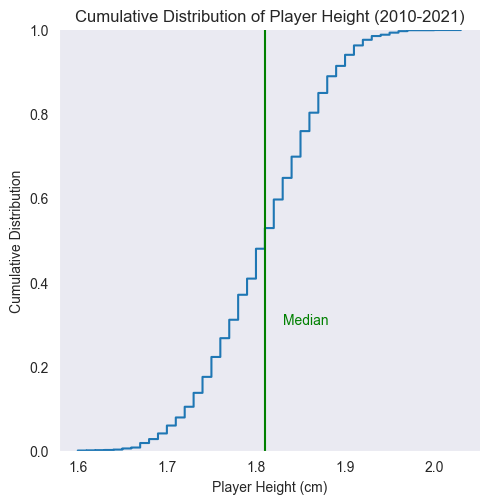

In [41]:
#plot cumulative distribution of player_height in players_info for all seasons
sns.displot(players_info_df['player_height'], kind='ecdf')
#show median
plt.axvline(players_info_df['player_height'].median(), color='green')
#add label for median line
plt.text(players_info_df['player_height'].median() + 0.02, 0.3, 'Median', color='green')
#add title and axes labels
plt.title('Cumulative Distribution of Player Height (2010-2021)')
plt.xlabel('Player Height (cm)')
plt.ylabel('Cumulative Distribution')
plt.show()

### 2.1.3 Players' Countries

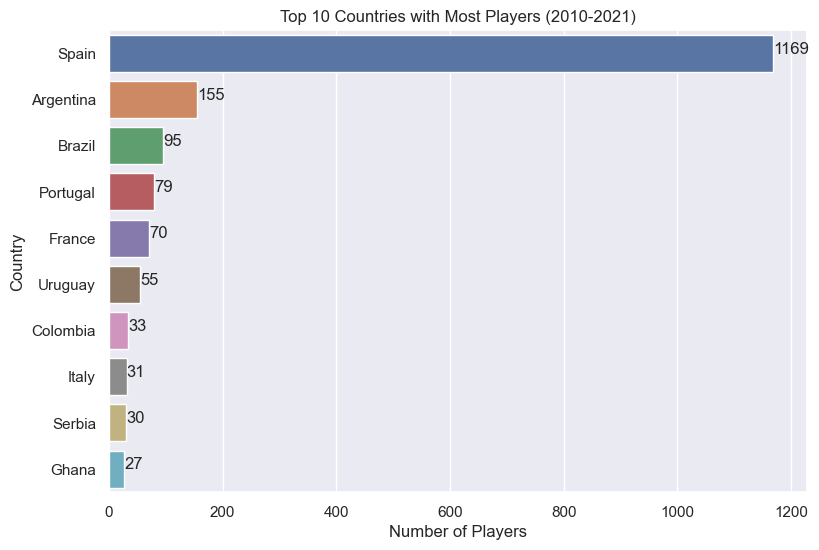

In [42]:
#plot seaborn horizontal bar plot for count of player_country in df
sns.set(rc={'figure.figsize':(9,6)})
top_10_countries = players_info_df['player_country'].value_counts().head(10)
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, orient='h')
#show number of players in each country next to the bars
for index, value in enumerate(top_10_countries):
    plt.text(value, index, str(value))
plt.title('Top 10 Countries with Most Players (2010-2021)')
plt.xlabel('Number of Players')
plt.ylabel('Country')
plt.show()

### 2.1.4 Players' Positions

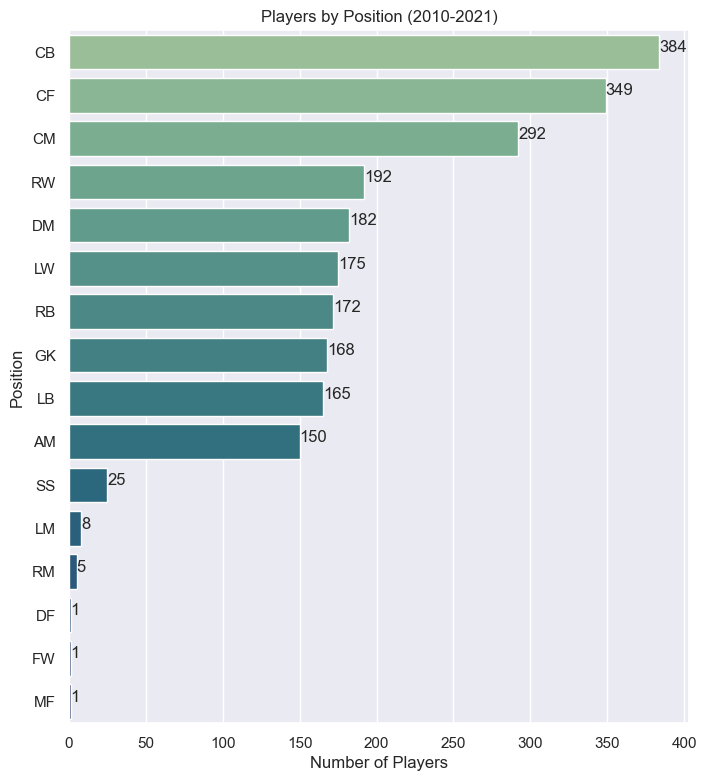

In [43]:
#show horizontal bar chart for count of player_position in df
sns.set(rc={'figure.figsize':(8,9)})
position_count = players_info_df['player_position'].value_counts()
sns.barplot(x=position_count.values, y=position_count.index, orient='h', palette='crest')
#show number of players in each position next to the bars
for index, value in enumerate(position_count):
    plt.text(value, index, str(value))
#set title and labels
plt.title('Players by Position (2010-2021)')
plt.xlabel('Number of Players')
plt.ylabel('Position')
plt.show()

### 2.1.5 Store Players' Information Data in the Database

We first replace missing values with None so that psycopg2 can deal with them

In [6]:
#convert player height column to string and replace missing values with None
players_info_df['player_height'] = players_info_df['player_height'].astype(str)
#replace NaN values with None
players_info_df['player_height'] = players_info_df['player_height'].replace('nan', None)

In [7]:
#replace NaN in player_position player_height player_country with None
players_info_df['player_height'] = players_info_df['player_height'].replace(np.nan, None)

In [8]:
players_info_df['player_position'] = players_info_df['player_position'].replace('nan', None)

In [9]:
players_info_df['player_country'] = players_info_df['player_country'].replace('nan', None)

In [12]:
#create player table
cur.execute("DROP TABLE IF EXISTS player CASCADE")
cur.execute("CREATE TABLE player( player_id SERIAL NOT NULL, player_name VARCHAR(35) NOT NULL, date_of_birth DATE, player_height NUMERIC(3,2), player_country VARCHAR(30), player_position VARCHAR(3) NOT NULL, PRIMARY KEY (player_id), UNIQUE (player_name))")

In [13]:
#insert players_info_df dataframe into player table
for i, row in players_info_df.iterrows():
    cur.execute("INSERT INTO player (player_name, date_of_birth, player_height, player_country, player_position) VALUES (%s, %s, %s, %s, %s)", (row['player'], row['date_of_birth'], row['player_height'], row['player_country'], row['player_position']))

In [7]:
#check if data is loaded successfully into the table
cur.execute("SELECT * FROM player LIMIT 5")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_id,player_name,date_of_birth,player_height,player_country,player_position
0,1,Sergio Abad Beyxer,1976-11-10,1.82,Spain,CM
1,2,Damià Abella,1982-04-15,1.88,Spain,RB
2,3,Éric Abidal,1979-09-11,1.86,France,LB
3,4,Santiago Acasiete,1977-11-22,1.82,Peru,CB
4,5,Lautaro Acosta,1988-03-14,1.69,Argentina,LW


In [9]:
#average player_height by country
cur.execute("SELECT player_country, ROUND(AVG(player_height),2) AS avg_height FROM player WHERE player_height > 1.5 GROUP BY player_country ORDER BY avg_height DESC")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
print(df)

   player_country avg_height
0         Belarus       1.94
1          Kosovo       1.94
2        Suriname       1.92
3         Ireland       1.92
4      Azerbaijan       1.91
..            ...        ...
93         Canada       1.75
94        England       1.74
95   South Africa       1.74
96          Congo       1.69
97   Saudi Arabia       1.69

[98 rows x 2 columns]


## 2.2 Seasons

In [17]:
#create season table
cur.execute("DROP TABLE IF EXISTS season CASCADE")
cur.execute("CREATE TABLE season ( season_id SERIAL, season_label CHAR(9) NOT NULL, best_player_id SMALLINT, best_goalkeeper_id SMALLINT, best_defender_id SMALLINT, best_midfielder1_id SMALLINT, best_midfielder2_id SMALLINT, best_forward_id SMALLINT, best_marca_footballer_id SMALLINT, PRIMARY KEY (season_id), UNIQUE (season_label), FOREIGN KEY (best_player_id) REFERENCES player(player_id), FOREIGN KEY (best_goalkeeper_id) REFERENCES player(player_id), FOREIGN KEY (best_defender_id) REFERENCES player(player_id), FOREIGN KEY (best_midfielder1_id) REFERENCES player(player_id), FOREIGN KEY (best_midfielder2_id) REFERENCES player(player_id), FOREIGN KEY (best_forward_id) REFERENCES player(player_id), FOREIGN KEY (best_marca_footballer_id) REFERENCES player(player_id), CHECK (season_label LIKE '20__-20__'))")

In [44]:
#get seasons' best players data from a csv file
season_best_players = pd.read_csv('Players Stats/seasons_best.csv', encoding='latin-1')

In [18]:
#insert season's best players data into season table. get player_id from player table using player_name
for index, row in season_best_players.iterrows():
    cur.execute("INSERT INTO season (season_label, best_player_id, best_goalkeeper_id, best_defender_id, best_midfielder1_id, best_midfielder2_id, best_forward_id, best_marca_footballer_id) VALUES (%s, (SELECT player_id FROM player WHERE player_name = %s), (SELECT player_id FROM player WHERE player_name = %s), (SELECT player_id FROM player WHERE player_name = %s), (SELECT player_id FROM player WHERE player_name = %s), (SELECT player_id FROM player WHERE player_name = %s), (SELECT player_id FROM player WHERE player_name = %s), (SELECT player_id FROM player WHERE player_name = %s))", (row['season'], row['best_player'], row['best_goalkeeper'], row['best_defender'], row['best_midfielder1'], row['best_midfielder2'], row['best_forward'], row['best_marca_footballer']))

In [10]:
#view stored data
cur.execute("SELECT * FROM season")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_id,season_label,best_player_id,best_goalkeeper_id,best_defender_id,best_midfielder1_id,best_midfielder2_id,best_forward_id,best_marca_footballer_id
0,1,2010-2011,337.0,520.0,3.0,540.0,242.0,337.0,337.0
1,2,2011-2012,337.0,101.0,426.0,24.0,242.0,337.0,448.0
2,3,2012-2013,337.0,587.0,426.0,241.0,242.0,337.0,448.0
3,4,2013-2014,448.0,670.0,426.0,NaN,242.0,448.0,448.0
4,5,2014-2015,337.0,78.0,426.0,1209.0,NaN,337.0,337.0
5,6,2015-2016,225.0,1186.0,214.0,NaN,NaN,337.0,448.0
6,7,2016-2017,337.0,1186.0,426.0,NaN,NaN,337.0,337.0
7,8,2017-2018,337.0,1186.0,NaN,NaN,NaN,337.0,337.0
8,9,2018-2019,NaN,NaN,NaN,NaN,NaN,NaN,337.0
9,10,2019-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN


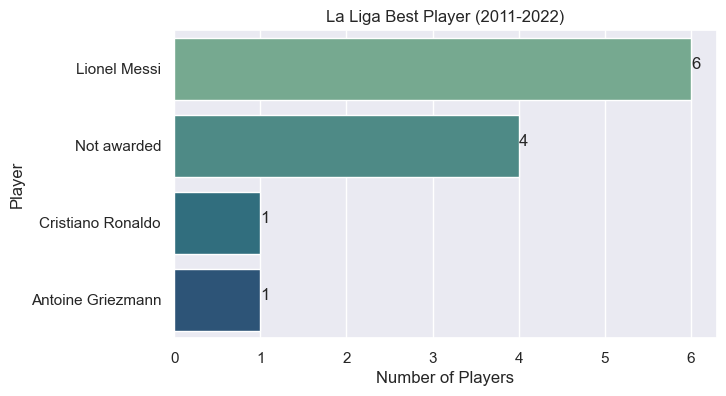

In [45]:
#show horizontal bar chart for count of La Liga best player (2011-2022)
sns.set(rc={'figure.figsize':(7,4)})
best_count = season_best_players['best_player'].value_counts()
sns.barplot(x=best_count.values, y=best_count.index, orient='h', palette='crest')
#show number of players in each position next to the bar
for index, value in enumerate(best_count):
    plt.text(value, index, str(value))
#set title and labels
plt.title('La Liga Best Player (2011-2022)')
plt.xlabel('Number of Players')
plt.ylabel('Player')
plt.show()

In [57]:
#generate season names as a list from 2010-2011 to 2021-2022
seasons = [str(i) + '-' + str(i+1) for i in range(2010, 2022)]

## 2.3 Teams

In [20]:
#create team table
cur.execute("DROP TABLE IF EXISTS team CASCADE")
cur.execute("CREATE TABLE team ( team_id SERIAL PRIMARY KEY, team_name VARCHAR(50) NOT NULL, UNIQUE (team_name))")

In [21]:
#get unique team_name from player_info list of dataframes
teams = []
for df in players_info:
    teams.extend(df['team_name'].unique())
#remove duplicates in teams list
teams = list(set(teams))
#insert teams into team table team_name column
for tm in teams:
    cur.execute("INSERT INTO team (team_name) VALUES (%s)", (tm,))

In [11]:
#check stored data
cur.execute("SELECT * FROM team")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,team_id,team_name
0,1,Elche
1,2,Real Sociedad
2,3,Celta Vigo
3,4,Leganés
4,5,Getafe
5,6,Racing Sant
6,7,Las Palmas
7,8,Valencia
8,9,La Coruña
9,10,Cádiz


## 2.4 Stadiums

In [24]:
#create stadium table
cur.execute("DROP TABLE IF EXISTS stadium CASCADE")
cur.execute("CREATE TABLE stadium (stadium_id SERIAL PRIMARY KEY, stadium_name VARCHAR(50) NOT NULL, team_id SMALLINT, FOREIGN KEY (team_id) REFERENCES team(team_id), UNIQUE (stadium_name))")

In [25]:
#insert the values to stadium table
stad_team = []
for season in seasons:
    df = pd.read_csv('Matches/'+season+'.csv', encoding='latin-1')
    #get unique stadium names from df dataframe
    stadiums = df['Venue'].unique()
    #use stadiums to get combinations of stadium_name and team_name
    for std in stadiums:
        teams = df[df['Venue'] == std]['Home'].unique()[0]
        #add stadium and team tuples to stad_team list
        stad_team.append((std, teams))
#remove duplicates from stad_team list
stad_team = list(set(stad_team))
#insert stadium and team tuples into stadium table
for std, tm in stad_team:
    cur.execute("INSERT INTO stadium (stadium_name, team_id) VALUES (%s, (SELECT team_id FROM team WHERE team_name = %s))", (std, tm))

In [12]:
#check stored data
cur.execute("SELECT * FROM stadium LIMIT 5")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,stadium_id,stadium_name,team_id
0,1,Ramón Sánchez Pizjuán,15
1,2,Estadio Mediterráneo,14
2,3,Ono Estadi,32
3,4,Cornellà -El Prat,21
4,5,Anoeta,2


In [13]:
#some stadiums have their names changed, but we will make no action
cur.execute("SELECT stadium_name FROM stadium WHERE team_id = 17")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,stadium_name
0,El Madrigal
1,Estadio de la Cerámica


## 2.5 Matches

In [47]:
#verify stages are between 1 and 38
stages = []
df = pd.read_csv('Matches/2010-2011.csv', encoding='latin-1')
stages.extend(df['Wk'].unique())
stages = list(stages)
print(stages)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


In [35]:
#create match table
cur.execute("DROP TABLE IF EXISTS match")
cur.execute("CREATE TABLE match (match_id SERIAL, season_id SMALLINT NOT NULL, stage SMALLINT, date DATE, home_team_id INT NOT NULL, away_team_id INT NOT NULL, home_team_score SMALLINT NOT NULL, away_team_score SMALLINT NOT NULL, referee VARCHAR(30), stadium_id SMALLINT, PRIMARY KEY (match_id), FOREIGN KEY (season_id) REFERENCES season(season_id), FOREIGN KEY (home_team_id) REFERENCES team(team_id), FOREIGN KEY (away_team_id) REFERENCES team(team_id), FOREIGN KEY (stadium_id) REFERENCES stadium(stadium_id), CHECK (home_team_score >= 0), CHECK (away_team_score >= 0), CHECK (date < '2022-07-01'), CHECK (date > '2010-08-01'), CHECK (stage > 0 AND stage <= 38), CHECK (home_team_id <> away_team_id), UNIQUE (season_id, home_team_id, away_team_id))")

In [48]:
#matches results are in csv files named after the seasons, one file for each season
#read the files and store the data in a dataframe
df_matches = pd.DataFrame()
for season in seasons:
    df = pd.read_csv('Matches/'+season+'.csv', encoding='latin-1')
    #give clearer names to the columns
    df.rename(columns={'Wk': 'stage', 'Venue': 'stadium_name'}, inplace=True)
    #add season column
    df['season'] = season
    #change Date and column to datetime format
    df['date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y').dt.date
    #extract time from Time column. format for some years is '19:00 (17:00)' extract only 19:00 without (17:00). sometimes only 19:00 is present
    #df['time'] = df['Time'].astype(str)
    #df['time'] = df['time'].str.extract(r'(\d{2}:\d{2})')
    #change time column to time format
    #df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time
    #extract home and away scored goals from Score column
    df['home_team_score'] = df['Score'].str.extract(r'(\d+)@\d+')
    df['away_team_score'] = df['Score'].str.extract(r'\d+@(\d+)')
    #remove ',' from attendance column
    df['Attendance'] = df['Attendance'].replace(',', '')
    #drop unuseful columns
    df = df.drop(['Day', 'Time', 'Score'], axis=1)
    df_matches = pd.concat([df_matches, df])

In [49]:
#number of matches in all seasons and related columns
df_matches.shape

(4560, 13)

In [50]:
df_matches.head()

,stage,Date,Home,Away,Attendance,stadium_name,Referee,season,date,home_team_score,away_team_score,Match Report,Notes
0,1,8/28/2010,Hércules,Athletic Club,NaN,José Rico Pérez,Rubinos Pérez,2010-2011,2010-08-28,0,1,NaN,NaN
1,1,8/28/2010,Málaga,Valencia,NaN,La Rosaleda,Muñiz Fernández,2010-2011,2010-08-28,1,3,NaN,NaN
2,1,8/28/2010,Levante,Sevilla,NaN,Ciutat de Valencia,Pérez Lasa,2010-2011,2010-08-28,1,4,NaN,NaN
3,1,8/29/2010,Espanyol,Getafe,NaN,Cornellà -El Prat,Ayza Gámez,2010-2011,2010-08-29,3,1,NaN,NaN
4,1,8/29/2010,La Coruña,Zaragoza,NaN,Nuevo Riazor,Teixeira Vitienes,2010-2011,2010-08-29,0,0,NaN,NaN


In [51]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4560 entries, 0 to 379
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   stage            4560 non-null   int64  
 1   Date             4560 non-null   object 
 2   Home             4560 non-null   object 
 3   Away             4560 non-null   object 
 4   Attendance       2552 non-null   object 
 5   stadium_name     4560 non-null   object 
 6   Referee          4560 non-null   object 
 7   season           4560 non-null   object 
 8   date             4560 non-null   object 
 9   home_team_score  4560 non-null   object 
 10  away_team_score  4560 non-null   object 
 11  Match Report     380 non-null    object 
 12  Notes            0 non-null      float64
dtypes: float64(1), int64(1), object(11)
memory usage: 498.8+ KB


In [52]:
#df_matches have home and away columns, create dataframe with number of home and away matches for each team
df_home = df_matches.groupby('Home').size().reset_index(name='home_matches')
df_away = df_matches.groupby('Away').size().reset_index(name='away_matches')
#merge home and away dataframes
df_home_away = pd.merge(df_home, df_away, left_on='Home', right_on='Away')
#sum home and away matches to get total matches
df_home_away['total_matches'] = df_home_away['home_matches'] + df_home_away['away_matches']
df_home_away['total_seasons'] = (df_home_away['total_matches']/38).astype(int)
#drop away_team column
df_home_away.drop('Away', axis=1, inplace=True)
#rename home_team column to team
df_home_away.rename(columns={'Home': 'team_name'}, inplace=True)
#sort dataframe by total matches
df_home_away.sort_values(by='total_matches', ascending=False, inplace=True)

In [53]:
df_home_away.head()

,team_name,home_matches,away_matches,total_matches,total_seasons
2,Athletic Club,228,228,456,12
3,Atlético Madrid,228,228,456,12
4,Barcelona,228,228,456,12
30,Valencia,228,228,456,12
28,Sevilla,228,228,456,12


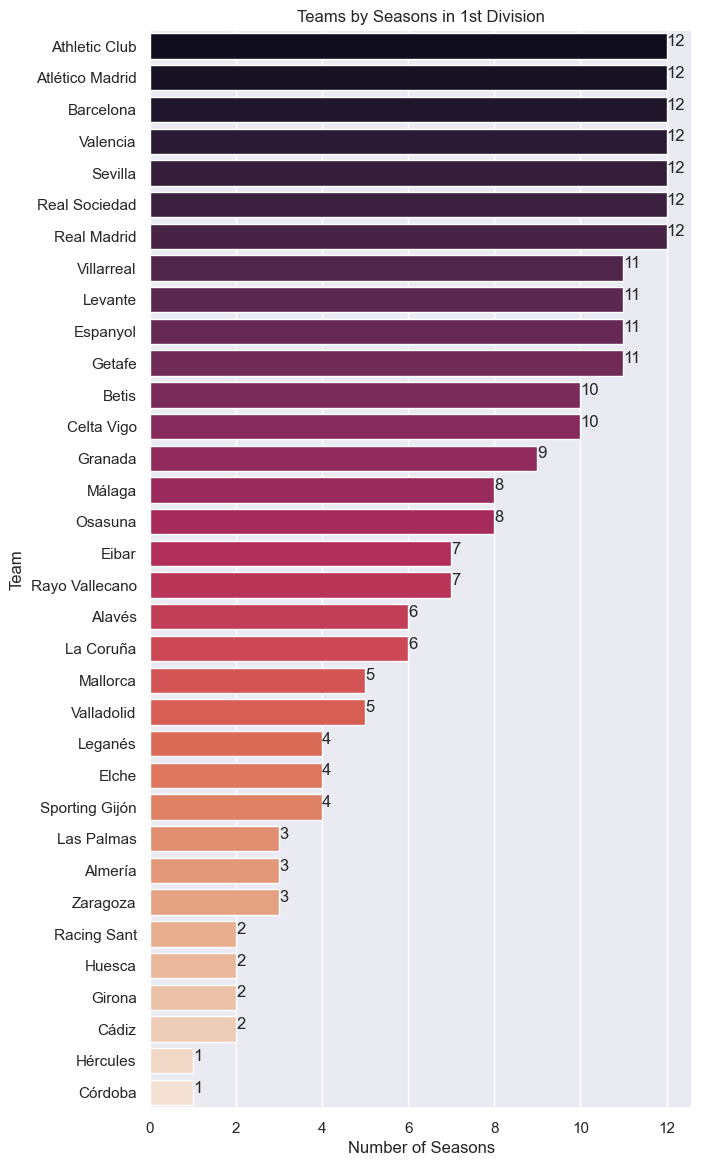

In [54]:
#plot horizontal bar chart of teams by number of seasons in the 1st division (2010-2011 to 2021-2022)
sns.set(rc={'figure.figsize':(7,14)})
sns.barplot(x='total_seasons', y='team_name', data=df_home_away, palette='rocket')
#show number of matches next to the bars
for index, value in enumerate(df_home_away['total_seasons']):
    plt.text(value, index, str(value))
#set title and labels
plt.title('Teams by Seasons in 1st Division')
plt.xlabel('Number of Seasons')
plt.ylabel('Team')
#show the plot
plt.show()

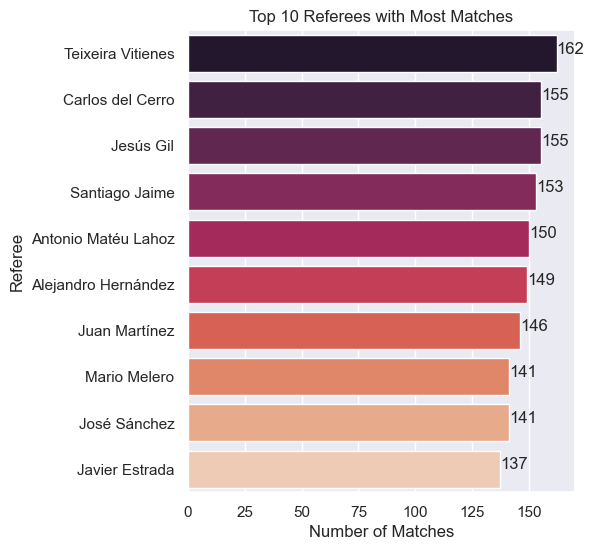

In [55]:
#count the number of matches for each referee
df_referee = df_matches.groupby('Referee').size().reset_index(name='matches')
#sort dataframe by matches
df_referee.sort_values(by='matches', ascending=False, inplace=True)
#plot bar chart of top 10 referees with most matches
sns.set(rc={'figure.figsize':(5,6)})
sns.barplot(x='matches', y='Referee', data=df_referee.head(10), palette='rocket')
#show the number of matches next to the bars
for index, value in enumerate(df_referee['matches'].head(10)):
    plt.text(value, index, str(value))
#set the title and labels
plt.title('Top 10 Referees with Most Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Referee')
plt.show()

In [56]:
#convert score columns to integer
df_matches['home_team_score'] = df_matches['home_team_score'].astype(int)
df_matches['away_team_score'] = df_matches['away_team_score'].astype(int)

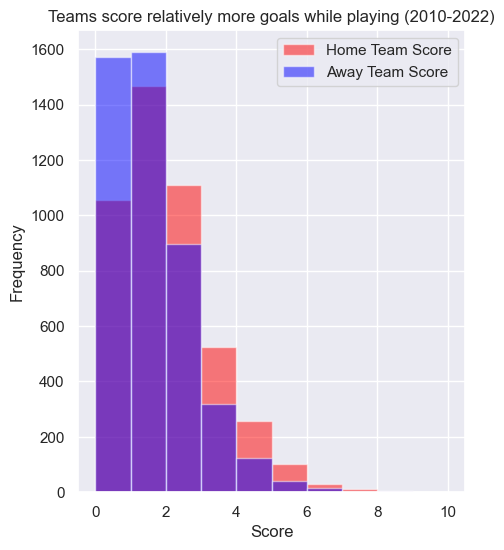

In [58]:
#plot histogram of home_team_score and away_team_score in the same plot
df_matches[['home_team_score', 'away_team_score']].plot.hist(alpha=0.5, bins=10, legend=True, color=['red', 'blue'])
#edit legend labels
plt.legend(['Home Team Score', 'Away Team Score'])
#set the title and axes labels
plt.title('Teams score relatively more goals while playing (2010-2022)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

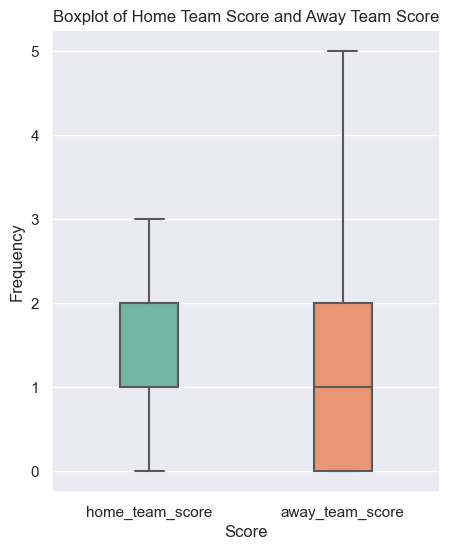

In [59]:
#plot boxplot of home_team_score and away_team_score ignoring outliers
#choose palette
palette = sns.color_palette('Set2')
sns.boxplot(data=df_matches[['home_team_score', 'away_team_score']], palette=palette, width=0.3, showfliers=False)
#set title and labels
plt.title('Boxplot of Home Team Score and Away Team Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
#show plot
plt.show()

In [60]:
#filter df_matches to get only matches where Real Madrid is the home team
df_real_madrid_home = df_matches[df_matches['Home'] == 'Real Madrid']
#filter df_matches to get only matches where Real Madrid is the away team
df_real_madrid_away = df_matches[df_matches['Away'] == 'Real Madrid']
#filter df_matches to get only matches where Barcelona is the home team
df_barcelona_home = df_matches[df_matches['Home'] == 'Barcelona']
#filter df_matches to get only matches where Barcelona is the away team
df_barcelona_away = df_matches[df_matches['Away'] == 'Barcelona']

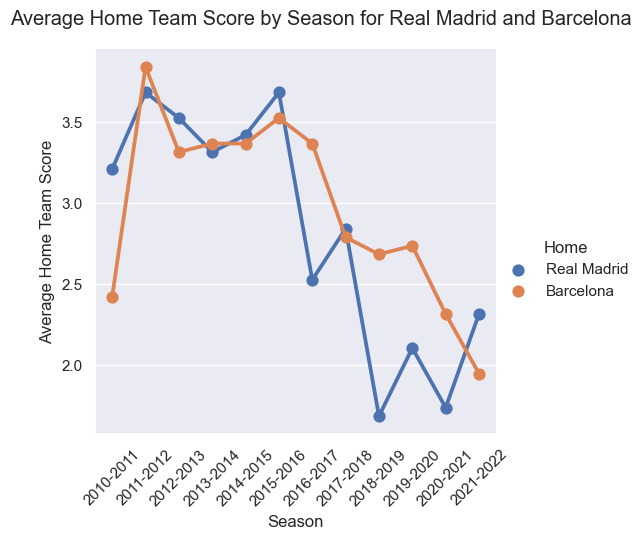

In [61]:
#plot point plot of average home_team_score by season for Real Madrid and Barcelona
sns.catplot(x='season', y='home_team_score', hue='Home', data=pd.concat([df_real_madrid_home, df_barcelona_home]), kind='point', errorbar=None)
#set title and labels
plt.subplots_adjust(top=0.9)
plt.suptitle('Average Home Team Score by Season for Real Madrid and Barcelona')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.ylabel('Average Home Team Score')
plt.show()

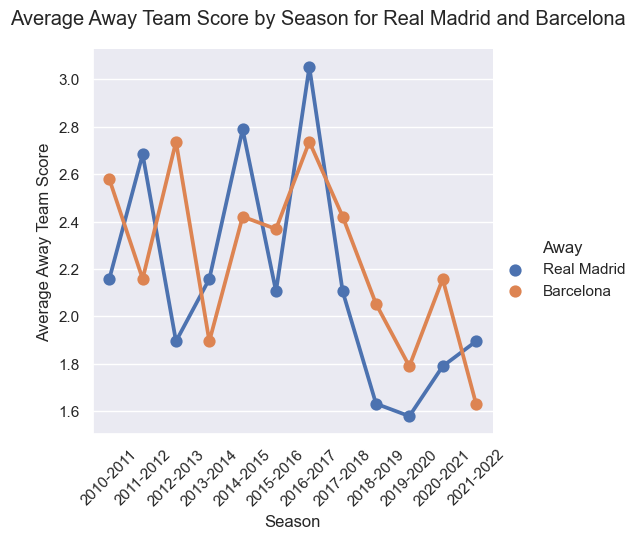

In [62]:
#plot point plot of average home_team_score by season for Real Madrid and Barcelona
sns.catplot(x='season', y='away_team_score', hue='Away', data=pd.concat([df_real_madrid_away, df_barcelona_away]), kind='point', errorbar=None)
#set title and labels
plt.subplots_adjust(top=0.9)
plt.suptitle('Average Away Team Score by Season for Real Madrid and Barcelona')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.ylabel('Average Away Team Score')
plt.show()

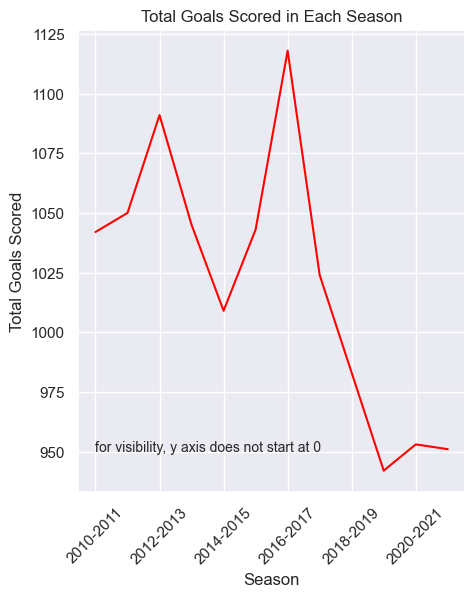

In [63]:
#calculate total goals scored in each season
df_season_goals = df_matches.groupby('season').sum(numeric_only=True)[['home_team_score', 'away_team_score']]
df_season_goals['total_goals'] = df_season_goals['home_team_score'] + df_season_goals['away_team_score']
#plot line plot of total goals scored in each season
df_season_goals['total_goals'].plot.line(color='red')
plt.title('Total Goals Scored in Each Season')
plt.xlabel('Season')
plt.ylabel('Total Goals Scored')
#x axis labels rotated 45 degrees
plt.xticks(rotation=45)
#add a note to the plot
plt.text(0, 950, 'for visibility, y axis does not start at 0', fontsize=10)
#show plot
plt.show()

In [131]:
#replace missing values with None to avoid errors raised while using psycogp2
df_matches['home_team_score'] = df_matches['home_team_score'].replace('NaN', 'None')
df_matches['away_team_score'] = df_matches['away_team_score'].replace('NaN', 'None')
df_matches['Attendance'] = df_matches['Attendance'].replace('', 'None')
df_matches['Attendance'] = df_matches['Attendance'].replace('NaN', 'None')

In [49]:
#insert data into match table
for index, row in df_matches.iterrows():
    cur.execute("INSERT INTO match (season_id, stage, date, home_team_id, away_team_id, home_team_score, away_team_score, stadium_id, referee) VALUES ((SELECT season_id FROM season WHERE season_label = %s), %s, %s, (SELECT team_id FROM team WHERE team_name = %s), (SELECT team_id FROM team WHERE team_name = %s), %s, %s, (SELECT stadium_id FROM stadium WHERE stadium_name = %s), %s)", (row['season'], row['stage'], row['date'], row['Home'], row['Away'], row['home_team_score'], row['away_team_score'], row['stadium_name'], row['Referee']))

In [14]:
#check inserted data
cur.execute("SELECT * FROM match LIMIT 6")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,match_id,season_id,stage,date,home_team_id,away_team_id,home_team_score,away_team_score,referee,stadium_id
0,1,1,1,2010-08-28,18,11,0,1,Rubinos Pérez,29
1,2,1,1,2010-08-28,25,8,1,3,Muñiz Fernández,52
2,3,1,1,2010-08-28,12,15,1,4,Pérez Lasa,43
3,4,1,1,2010-08-29,21,5,3,1,Ayza Gámez,4
4,5,1,1,2010-08-29,9,24,0,0,Teixeira Vitienes,41
5,6,1,1,2010-08-29,19,14,0,0,Álvarez Izquierdo,38


## 2.6 Teams' Statistics

In [72]:
# create team_statistics table
cur.execute("DROP TABLE IF EXISTS team_statistics")
cur.execute("CREATE TABLE team_statistics (team_id SMALLINT NOT NULL, season_id SMALLINT NOT NULL, goals SMALLINT, assists SMALLINT, avg_possession NUMERIC(3,1), shots SMALLINT, shots_on_target SMALLINT, shot_avg_distance SMALLINT, free_kicks SMALLINT, penalties_attempted SMALLINT, penalties_scored SMALLINT, fouls_drawn SMALLINT, offsides SMALLINT, crosses SMALLINT, goals_against SMALLINT, shots_on_target_against SMALLINT, saves SMALLINT, clean_sheets SMALLINT, penalties_conceded SMALLINT, penalties_against_saved SMALLINT, penalties_against_missed SMALLINT, tackles_won SMALLINT, blocks SMALLINT, interceptions SMALLINT, fouls_committed SMALLINT, yellow_cards SMALLINT, red_cards SMALLINT, passes_attempted SMALLINT, passes_completed SMALLINT, aerials_won SMALLINT, aerials_lost SMALLINT, PRIMARY KEY (team_id, season_id), FOREIGN KEY (team_id) REFERENCES team(team_id), FOREIGN KEY (season_id) REFERENCES season(season_id))")

In [18]:
#generate season names as a list from 2010-2011 to 2021-2022
seasons = [str(i) + '-' + str(i+1) for i in range(2010, 2022)]

In [19]:
#insert df data into team_statistics table in Liga database, find team_id using team_name from team table in Liga database
for index, season in enumerate(seasons):
    #read team general statistics to df
    df_general = pd.read_csv('Teams Stats/Teams General/'+season+'.csv' , encoding='latin_1', skiprows=1)
    #give clearer names to the columns
    df_general.rename(columns={'Squad': 'team_name', 'Poss': 'avg_possession', 'Gls':'goals', 'Ast':'assists', 'PK':'penalties_scored', 'PKatt': 'penalties_attempted', 'CrdY': 'yellow_cards', 'CrdR': 'red_cards'}, inplace=True)
    #add season_name column
    df_general['season_name'] = season
    #read team attack statistics by season to df_attack, files are csv files named after the seasons, one file for each season
    df_attack = pd.read_csv('Teams Stats/Teams Attack/'+season+'.csv' , encoding='latin_1', skiprows=1)
    #give clearer names to the columns
    df_attack.rename(columns={'Squad': 'team_name', 'Sh': 'shots', 'SoT': 'shots_on_target', 'Dist': 'shot_avg_distance', 'FK': 'free_kicks'}, inplace=True)
    #convert shot_avg_distance column from yards to meters then round to the nearest integer
    df_attack['shot_avg_distance'] = df_attack['shot_avg_distance']*0.9144
    df_attack['shot_avg_distance'] = df_attack['shot_avg_distance'].round(0)

    #read team goalkeeping statistics by season to df_goalkeeping, files are csv files named after the seasons, one file for each season
    df_goalkeeping = pd.read_csv('Teams Stats/Teams Goalkeeping/'+season+'.csv' , encoding='latin_1', skiprows=1)
    #give clearer names to the columns
    df_goalkeeping.rename(columns={'Squad': 'team_name', 'GA': 'goals_against', 'SoTA': 'shots_on_target_against', 'CS': 'clean_sheets', 'PKA': 'penalties_conceded', 'PKsv': 'penalties_against_saved', 'PKm': 'penalties_against_missed'}, inplace=True)

    #merge all the dataframes into one dataframe
    df = pd.merge(df_general, df_attack, on='team_name')
    df = pd.merge(df, df_goalkeeping, on='team_name')

    if index >= seasons.index('2017-2018'):

        #read team defense statistics by season to df_defence, files are csv files named after the seasons, one file for each season
        df_defence = pd.read_csv('Teams Stats/Teams Defense/'+season+'.csv' , encoding='latin_1', skiprows=1)
        #give clearer names to the columns
        df_defence.rename(columns={'Squad': 'team_name', 'TklW': 'tackles_won', 'Int': 'interceptions'}, inplace=True)
        #read team passing statistics by season to df_passing, files are csv files named after the seasons, one file for each season
        df_passing = pd.read_csv('Teams Stats/Teams Passing/'+season+'.csv' , encoding='latin_1', skiprows=1)
        #give clearer names to the columns
        df_passing.rename(columns={'Squad': 'team_name', 'Cmp': 'passes_completed', 'Att': 'passes_attempted'}, inplace=True)

        # read team miscellaneous statistics by season to df_misc, files are csv files named after the seasons, one file for each season
        df_misc = pd.read_csv('Teams Stats/Teams Other/'+season+'.csv' , encoding='latin_1', skiprows=1)
        #give clearer names to the columns
        df_misc.rename(columns={'Squad': 'team_name', 'Fls': 'fouls_committed', 'Fld': 'fouls_drawn', 'Off': 'offsides', 'Crs': 'crosses', 'Won': 'aerials_won', 'Lost': 'aerials_lost'}, inplace=True)

        df = pd.merge(df, df_defence, on='team_name')
        df = pd.merge(df, df_passing, on='team_name')
        df = pd.merge(df, df_misc, on='team_name')

    else:
        df['tackles_won'] = 0
        df['Blocks'] = 0
        df['interceptions'] = 0
        df['passes_attempted'] = 0
        df['passes_completed'] = 0
        df['fouls_committed'] = 0
        df['fouls_drawn'] = 0
        df['offsides'] = 0
        df['crosses'] = 0
        df['aerials_won'] = 0
        df['aerials_lost'] = 0
    df.fillna(value=0, inplace=True)
    #insert data into team_statistics table
    for index2, row in df.iterrows():
        cur.execute("INSERT INTO team_statistics (team_id, season_id, avg_possession, goals, assists, penalties_scored, penalties_attempted, yellow_cards, red_cards, shots, shots_on_target, shot_avg_distance, free_kicks, tackles_won, interceptions, blocks, goals_against, shots_on_target_against, saves, clean_sheets, penalties_conceded, penalties_against_saved, penalties_against_missed, passes_completed, passes_attempted, fouls_committed, fouls_drawn, offsides, crosses, aerials_won, aerials_lost) VALUES ((SELECT team_id FROM team WHERE team_name = %s), (SELECT season_id FROM season WHERE season_label = %s), %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", (row['team_name'], row['season_name'], row['avg_possession'], row['goals'], row['assists'], row['penalties_scored'], row['penalties_attempted'], row['yellow_cards'], row['red_cards'], row['shots'], row['shots_on_target'], row['shot_avg_distance'], row['free_kicks'], row['tackles_won'], row['interceptions'], row['Blocks'],row['goals_against'], row['shots_on_target_against'], row['Saves'], row['clean_sheets'], row['penalties_conceded'], row['penalties_against_saved'], row['penalties_against_missed'], row['passes_completed'], row['passes_attempted'], row['fouls_committed'], row['fouls_drawn'], row['offsides'], row['crosses'], row['aerials_won'], row['aerials_lost']))

In [15]:
#check inserted data
cur.execute("SELECT * FROM team_statistics LIMIT 5")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,team_id,season_id,goals,assists,avg_possession,shots,shots_on_target,shot_avg_distance,free_kicks,penalties_attempted,...,tackles_won,blocks,interceptions,fouls_committed,yellow_cards,red_cards,passes_attempted,passes_completed,aerials_won,aerials_lost
0,14,1,36,27,0.0,0,151,0,0,1,...,0,0,0,0,100,4,0,0,0,0
1,11,1,57,34,0.0,0,193,0,0,11,...,0,0,0,0,102,7,0,0,0,0
2,28,1,61,44,0.0,0,213,0,0,5,...,0,0,0,0,105,5,0,0,0,0
3,26,1,94,73,0.0,0,286,0,0,5,...,0,0,0,0,72,2,0,0,0,0
4,21,1,44,28,0.0,0,184,0,0,6,...,0,0,0,0,109,5,0,0,0,0


## 2.7 Players' Statistics

In [84]:
# create player_statistics table
cur.execute("DROP TABLE IF EXISTS player_statistics")
cur.execute("CREATE TABLE player_statistics (player_id SMALLINT NOT NULL, season_id SMALLINT NOT NULL, team_id SMALLINT NOT NULL, matches_played SMALLINT, starts SMALLINT, minutes_played SMALLINT, goals SMALLINT, assists SMALLINT, penalties_scored SMALLINT, penalties_attempted SMALLINT, shots SMALLINT, shots_on_target SMALLINT, shoot_avg_distance SMALLINT, pass_attempted SMALLINT, pass_completed SMALLINT, tackles_won SMALLINT, blocks SMALLINT, interceptions SMALLINT, fouls_committed SMALLINT, fouls_drawn SMALLINT, offsides SMALLINT, crosses SMALLINT, aerials_won SMALLINT, aerials_lost SMALLINT, yellow_cards SMALLINT, red_cards SMALLINT, market_value INT, goals_against SMALLINT DEFAULT 0, shots_on_target_against SMALLINT DEFAULT 0, saves SMALLINT DEFAULT 0, clean_sheets SMALLINT DEFAULT 0, penalties_saved SMALLINT DEFAULT 0, penalties_missed SMALLINT DEFAULT 0, penalties_scored_against SMALLINT DEFAULT 0, PRIMARY KEY (player_id, season_id, team_id), FOREIGN KEY (player_id) REFERENCES player(player_id), FOREIGN KEY (season_id) REFERENCES season(season_id), FOREIGN KEY (team_id) REFERENCES team(team_id), CHECK ((market_value < 200000000) OR market_value IS NULL))")

In [65]:
#generate season names as a list from 2010-2011 to 2021-2022
seasons = [str(i) + '-' + str(i+1) for i in range(2010, 2022)]

In [20]:
#read saved players_stats csv files into players_stats list of dataframes
players_stats = []
for i in range(12):
    df = pd.read_csv('Play_Sts/players_stats_{}.csv'.format(i))
    #if market_value < 20000 replace with 0 (to avoid entering non-logical value to the database
    df['market_value'] = [0 if x < 20000 else x for x in df['market_value']]
    #for years 2010-2011 to 2016-2017 there is no columns for some statistics. We assign them a value of 0
    if i < 7:
        df['tackles_won'] = 0
        df['blocks'] = 0
        df['interceptions'] = 0
        df['pass_attempted'] = 0
        df['pass_completed'] = 0
        df['fouls_committed'] = 0
        df['fouls_drawn'] = 0
        df['offsides'] = 0
        df['crosses'] = 0
        df['aerials_won'] = 0
        df['aerials_lost'] = 0
    df.fillna(value=0, inplace=True)
    players_stats.append(df)

In [21]:
players_stats[0].head(5)

,player,team_name,matches_played,starts,minutes_played,goals,assists,penalties_scored,penalties_attempted,yellow_cards,...,blocks,interceptions,pass_attempted,pass_completed,fouls_committed,fouls_drawn,offsides,crosses,aerials_won,aerials_lost
0,Sergio Abad Beyxer,Levante,1,0,5,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,Damià Abella,Osasuna,27,22,1934,0,0.0,0,0.0,7,...,0,0,0,0,0,0,0,0,0,0
2,Éric Abidal,Barcelona,26,23,2023,0,0.0,0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
3,Santiago Acasiete,Almería,20,17,1598,0,0.0,0,0.0,4,...,0,0,0,0,0,0,0,0,0,0
4,Lautaro Acosta,Sevilla,10,2,283,0,1.0,0,0.0,3,...,0,0,0,0,0,0,0,0,0,0


In [22]:
players_stats[8].head(5)

,player,team_name,matches_played,starts,minutes_played,goals,assists,penalties_scored,penalties_attempted,yellow_cards,...,penalties_scored_against,penalties_saved,penalties_missed,matches,matches2,player_matched,club,season,player_name,market_value
0,Antonio Adán,Atlético Madrid,1,1,90,0,0,0,0,1,...,0.0,0.0,0.0,Antonio Adán,Antonio Adán,Antonio Adán,Atlético de Madrid,2018-2019,Antonio Adán,1500000.0
1,Aday,Girona,10,8,645,0,2,0,0,2,...,0.0,0.0,0.0,0,Aday Benítez,Aday Benítez,Girona FC,2018-2019,Aday Benítez,1500000.0
2,Aritz Aduriz,Athletic Club,20,10,943,2,0,2,2,5,...,0.0,0.0,0.0,Aritz Aduriz,Aritz Aduriz,Aritz Aduriz,Athletic Bilbao,2018-2019,Aritz Aduriz,1000000.0
3,Luis Advíncula,Rayo Vallecano,28,27,2389,1,3,0,0,6,...,0.0,0.0,0.0,Luis Advíncula,Luis Advíncula,Luis Advíncula,Rayo Vallecano,2018-2019,Luis Advíncula,3000000.0
4,Martin Agirregabiria,Alavés,27,23,2032,0,0,0,0,4,...,0.0,0.0,0.0,Martín Aguirregabiria,Martín Aguirregabiria,Martín Aguirregabiria,Deportivo Alavés,2018-2019,Martín Aguirregabiria,7500000.0


In [68]:
#remove duplicate for the combination of player, season, and team
for i in range(len(players_stats)):
    players_stats[i] = players_stats[i].drop_duplicates(subset=['player', 'team_name', 'team_name'], keep='first')

In [162]:
#check season column values
for df in players_stats:
    print(df['season'].unique())

['2010-2011']
['2011-2012']
['2012-2013']
['2013-2014' 0]
['2014-2015']
['2015-2016']
['2016-2017']
['2017-2018']
['2018-2019']
['2019-2020']
['2020-2021' 0]
['2021-2022']


In [70]:
#drop rows where season = 0 (these rows are the result of failure to merge the data sources because of the absense of a player's data in one of them)
players_stats[3] = players_stats[3][players_stats[3]['season'] != 0]
players_stats[10] = players_stats[10][players_stats[10]['season'] != 0]

In [71]:
#create a single dataframe we will use to visualize players statistics
df_players = pd.DataFrame()
for element in players_stats:
    df_players =pd.concat([df_players, element], ignore_index=True)

In [176]:
df_players.columns

Index(['player', 'team_name', 'matches_played', 'starts', 'minutes_played',
       'goals', 'assists', 'penalties_scored', 'penalties_attempted',
       'yellow_cards', 'red_cards', 'shots', 'shots_on_target',
       'shoot_avg_distance', 'goals_against', 'shots_on_target_against',
       'saves', 'clean_sheets', 'penalties_scored_against', 'penalties_saved',
       'penalties_missed', 'matches', 'matches2', 'player_matched', 'club',
       'season', 'player_name', 'market_value', 'tackles_won', 'blocks',
       'interceptions', 'pass_attempted', 'pass_completed', 'fouls_committed',
       'fouls_drawn', 'offsides', 'crosses', 'aerials_won', 'aerials_lost'],
      dtype='object')

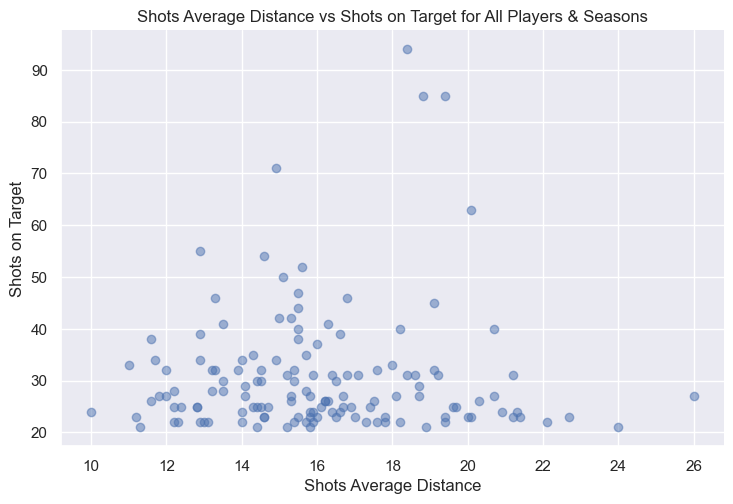

In [72]:
#plot a scatter plot of shots on target by shooting average distance for each player and season
#filter for players with more than 20 matches played and more than 20 shots on target
df_shots = df_players[(df_players['matches_played'] > 20) & (df_players['shots_on_target'] > 20) & (df_players['shoot_avg_distance'] > 0)]
sns.lmplot(x='shoot_avg_distance', y='shots_on_target', data=df_shots, fit_reg=False, height=5, aspect=1.5,
           scatter_kws={'alpha': 0.5})
#set title and labels
plt.title('Shots Average Distance vs Shots on Target for All Players & Seasons')
plt.xlabel('Shots Average Distance')
plt.ylabel('Shots on Target')
plt.show()

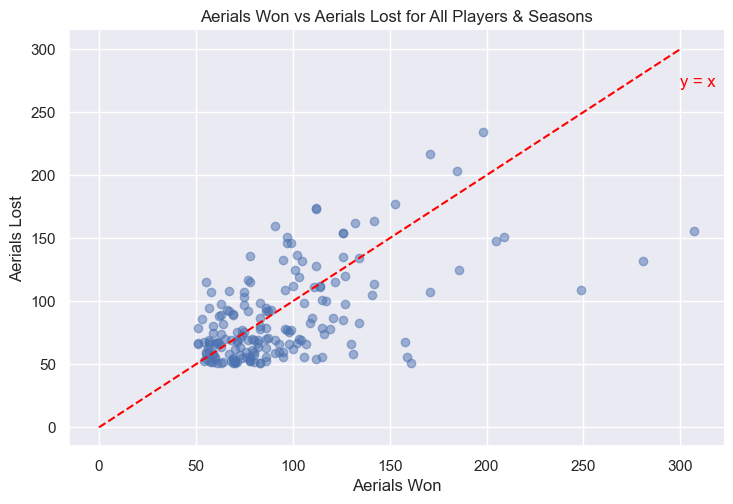

In [73]:
#plot a scatter plot of aerial duels won and aerial duels lost for each player and season
#filter for players with more than 20 matches played and more than 50 aerials_won and more than 50 aerials_lost
df_aerials = df_players[(df_players['matches_played'] > 20) & (df_players['aerials_won'] > 50) & (df_players['aerials_lost'] > 50)]
sns.lmplot(x='aerials_won', y='aerials_lost', data=df_aerials, fit_reg=False, height=5, aspect=1.5, scatter_kws={'alpha':0.5})
#show equality line of y=x
plt.plot([0, 300], [0, 300], color='red', linestyle='--')
plt.text(300, 270, 'y = x', color='red')
#set title and labels
plt.title('Aerials Won vs Aerials Lost for All Players & Seasons')
plt.xlabel('Aerials Won')
plt.ylabel('Aerials Lost')
plt.show()

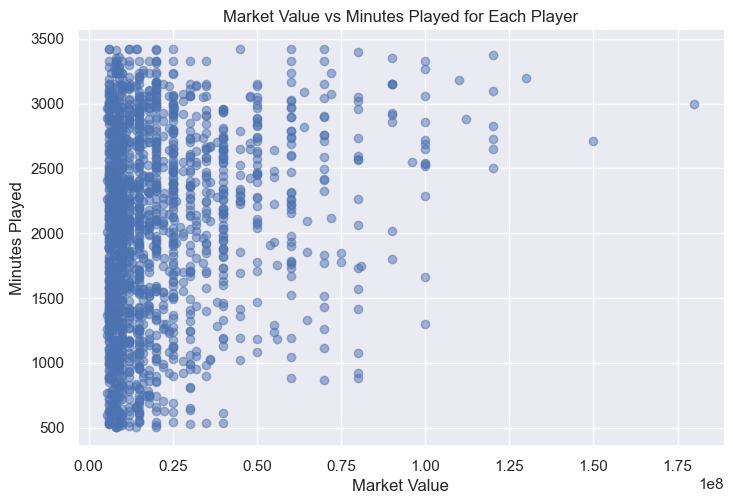

In [74]:
#plot scatter plot of market_value and minutes_played for each player and season
#filter for players with minutes played greater than 500 and market_value greater than 5 millions
df_market = df_players[(df_players['minutes_played'] > 500) & (df_players['market_value'] > 5000000)]
sns.lmplot(x='market_value', y='minutes_played', data=df_market, fit_reg=False, height=5, aspect=1.5, scatter_kws={'alpha':0.5})
#set title and labels
plt.title('Market Value vs Minutes Played for Each Player')
plt.xlabel('Market Value')
plt.ylabel('Minutes Played')
plt.show()

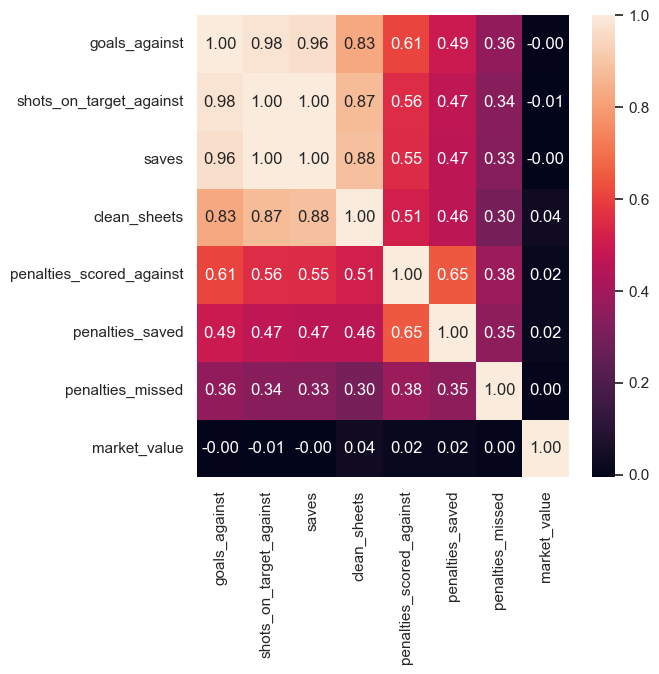

In [75]:
#show correlation heatmap for goalkeeping statistics
df_goalkeeping = df_players[['goals_against', 'shots_on_target_against', 'saves', 'clean_sheets', 'penalties_scored_against', 'penalties_saved', 'penalties_missed', 'market_value']]
plt.figure(figsize=(6, 6))
sns.heatmap(df_goalkeeping.corr(), annot=True, fmt='.2f')
plt.show()

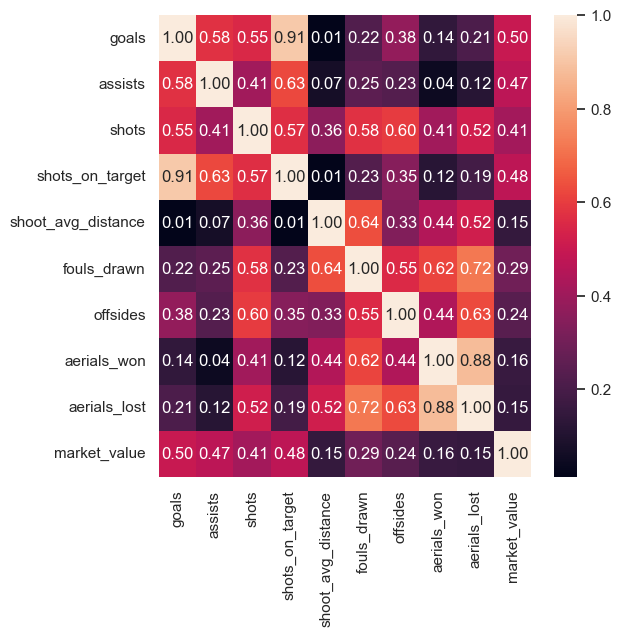

In [76]:
#show correlation heatmap for attacking statistics
df_attack = df_players[['goals', 'assists', 'shots', 'shots_on_target', 'shoot_avg_distance', 'fouls_drawn', 'offsides', 'aerials_won', 'aerials_lost', 'market_value']]
plt.figure(figsize=(6, 6))
sns.heatmap(df_attack.corr(), annot=True, fmt='.2f')
plt.show()

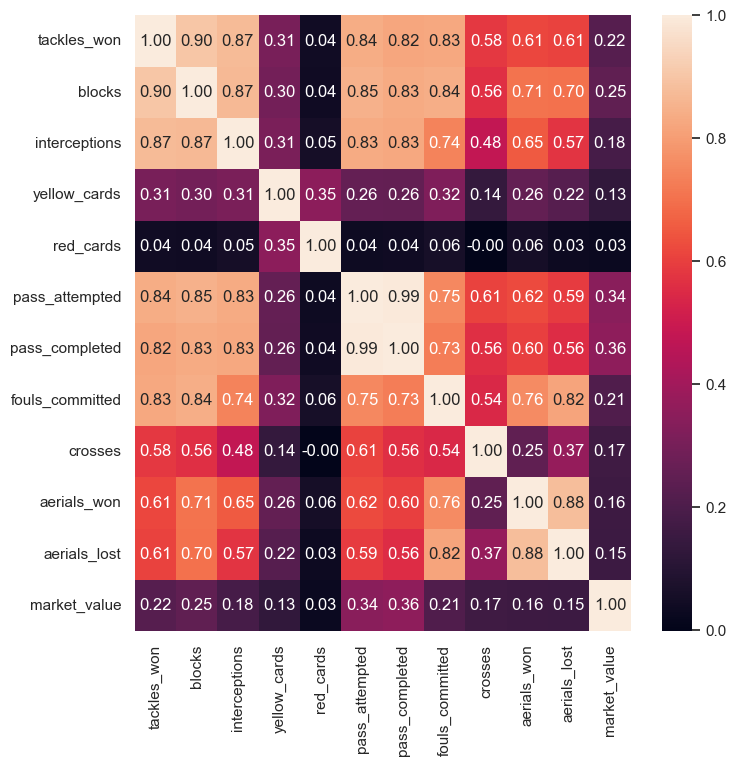

In [77]:
#show correlation heatmap for defending statistics
plt.figure(figsize=(8, 8))
df_defence = df_players[['tackles_won', 'blocks', 'interceptions', 'yellow_cards', 'red_cards', 'pass_attempted', 'pass_completed', 'fouls_committed', 'crosses', 'aerials_won', 'aerials_lost', 'market_value']]
sns.heatmap(df_defence.corr(), annot=True, fmt='.2f')
plt.show()

In [96]:
#insert data into player_statistics table
for df in players_stats:
    #insert df data into player_statistics table, find player_id, team_id and season_id with player_name, team_name and season_label from player, team and season tables, respectively
    for index, row in df.iterrows():
        cur.execute("INSERT INTO player_statistics (player_id, season_id, team_id, matches_played, starts, minutes_played, goals, assists, penalties_scored, penalties_attempted, shots, shots_on_target, shoot_avg_distance, pass_attempted, pass_completed, tackles_won, blocks, interceptions, fouls_committed, fouls_drawn, offsides, crosses, aerials_won, aerials_lost, yellow_cards, red_cards, market_value, goals_against, shots_on_target_against, saves, clean_sheets, penalties_saved, penalties_missed, penalties_scored_against) VALUES ((SELECT player_id FROM player WHERE player_name = %s), (SELECT season_id FROM season WHERE season_label = %s), (SELECT team_id FROM team WHERE team_name = %s), %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", (row['player'], row['season'], row['team_name'], row['matches_played'], row['starts'], row['minutes_played'], row['goals'], row['assists'], row['penalties_scored'], row['penalties_attempted'], row['shots'], row['shots_on_target'], row['shoot_avg_distance'], row['pass_attempted'], row['pass_completed'], row['tackles_won'], row['blocks'], row['interceptions'], row['fouls_committed'], row['fouls_drawn'], row['offsides'], row['crosses'], row['aerials_won'], row['aerials_lost'], row['yellow_cards'], row['red_cards'], row['market_value'], row['goals_against'], row['shots_on_target_against'], row['saves'], row['clean_sheets'], row['penalties_saved'],  row['penalties_missed'], row['penalties_scored_against']))

In [16]:
#select 5 rows from player_statistics table
cur.execute("SELECT * FROM player_statistics LIMIT 5")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_id,season_id,team_id,matches_played,starts,minutes_played,goals,assists,penalties_scored,penalties_attempted,...,yellow_cards,red_cards,market_value,goals_against,shots_on_target_against,saves,clean_sheets,penalties_saved,penalties_missed,penalties_scored_against
0,1,1,12,1,0,5,0,0,0,0,...,0,0,1000000,0,0,0,0,0,0,0
1,2,1,19,27,22,1934,0,0,0,0,...,7,1,2500000,0,0,0,0,0,0,0
2,3,1,26,26,23,2023,0,0,0,0,...,3,0,17000000,0,0,0,0,0,0,0
3,4,1,14,20,17,1598,0,0,0,0,...,4,0,700000,0,0,0,0,0,0,0
4,5,1,15,10,2,283,0,1,0,0,...,3,0,1000000,0,0,0,0,0,0,0


# 3. Data Analysis with SQL

In [23]:
#select top 10 El Clasico matches with most total goals
cur.execute("SELECT t1.team_name AS home_team, t2.team_name AS away_team, m.home_team_score, m.away_team_score, m.home_team_score + m.away_team_score AS total_goals FROM match m INNER JOIN team t1 ON m.home_team_id = t1.team_id INNER JOIN team t2 ON m.away_team_id = t2.team_id WHERE (t1.team_name = 'Barcelona' AND t2.team_name = 'Real Madrid') OR (t1.team_name = 'Real Madrid' AND t2.team_name = 'Barcelona') ORDER BY total_goals DESC LIMIT 10")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,home_team,away_team,home_team_score,away_team_score,total_goals
0,Real Madrid,Barcelona,3,4,7
1,Barcelona,Real Madrid,5,1,6
2,Real Madrid,Barcelona,2,3,5
3,Barcelona,Real Madrid,5,0,5
4,Real Madrid,Barcelona,1,3,4
5,Barcelona,Real Madrid,2,2,4
6,Real Madrid,Barcelona,0,4,4
7,Real Madrid,Barcelona,3,1,4
8,Barcelona,Real Madrid,2,2,4
9,Barcelona,Real Madrid,1,3,4


In [24]:
#select for each score the number of games in which it was in all seasons
cur.execute("SELECT home_team_score || ' : ' || away_team_score AS score, COUNT(*) AS games FROM match GROUP BY score ORDER BY games DESC")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,score,games
0,1 : 1,512
1,1 : 0,496
2,2 : 1,408
3,0 : 0,361
4,2 : 0,352
5,0 : 1,342
6,1 : 2,305
7,2 : 2,227
8,0 : 2,209
9,3 : 0,201


In [25]:
#select El Clasico matches hosted by Real Madrid and the scores
cur.execute("SELECT m.date, m.home_team_score, m.away_team_score, CASE WHEN m.home_team_score > m.away_team_score THEN 'Real Madrid win' WHEN m.home_team_score = m.away_team_score THEN 'Draw' ELSE 'Barcelona win' END AS result FROM match m INNER JOIN team t ON m.home_team_id = t.team_id WHERE t.team_name = 'Real Madrid' AND m.away_team_id = (SELECT team_id FROM team WHERE team_name = 'Barcelona') ORDER BY m.date")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,date,home_team_score,away_team_score,result
0,2011-04-16,1,1,Draw
1,2011-12-10,1,3,Barcelona win
2,2013-03-02,2,1,Real Madrid win
3,2014-03-23,3,4,Barcelona win
4,2014-10-25,3,1,Real Madrid win
5,2015-11-21,0,4,Barcelona win
6,2017-04-23,2,3,Barcelona win
7,2017-12-23,0,3,Barcelona win
8,2019-03-02,0,1,Barcelona win
9,2020-03-01,2,0,Real Madrid win


In [26]:
#El Clasico outcomes count
cur.execute("SELECT CASE WHEN m.home_team_score > m.away_team_score AND m.home_team_id = (SELECT team_id FROM team WHERE team_name = 'Real Madrid') THEN 'Real Madrid win' \
                WHEN m.home_team_score > m.away_team_score AND m.home_team_id = (SELECT team_id FROM team WHERE team_name = 'Barcelona') THEN 'Barcelona win' \
                WHEN m.home_team_score = m.away_team_score THEN 'Draw' \
                WHEN m.home_team_score < m.away_team_score AND m.home_team_id = (SELECT team_id FROM team WHERE team_name = 'Real Madrid') THEN 'Real Madrid win' \
                WHEN m.home_team_score < m.away_team_score AND m.home_team_id = (SELECT team_id FROM team WHERE team_name = 'Barcelona') THEN 'Barcelona win' \
            END AS result, COUNT(*) AS games \
            FROM match m \
            WHERE m.away_team_id IN (SELECT team_id FROM team WHERE team_name = 'Barcelona' OR team_name = 'Real Madrid') \
                AND m.home_team_id IN (SELECT team_id FROM team WHERE team_name = 'Barcelona' OR team_name = 'Real Madrid') \
            GROUP BY result \
            ORDER BY games DESC")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,result,games
0,Real Madrid win,11
1,Barcelona win,8
2,Draw,5


In [27]:
#total goals scored in El Clasico by Real Madrid and Barcelona home
cur.execute("SELECT t.team_name, SUM(m.home_team_score) AS total_goals_home \
            FROM match m \
            INNER JOIN team t ON m.home_team_id = t.team_id \
            WHERE t.team_name = 'Real Madrid' \
                AND m.away_team_id = (SELECT team_id FROM team WHERE team_name = 'Barcelona')\
            GROUP BY t.team_name\
            UNION \
            SELECT t.team_name, SUM(m.home_team_score) AS total_goals_home \
            FROM match m \
            INNER JOIN team t ON m.home_team_id = t.team_id \
            WHERE t.team_name = 'Barcelona' \
                AND m.away_team_id = (SELECT team_id FROM team WHERE team_name = 'Real Madrid') \
            GROUP BY t.team_name")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,team_name,total_goals_home
0,Barcelona,23
1,Real Madrid,16


In [28]:
#total goals scored in El Clasico by Real Madrid and Barcelona away
cur.execute("SELECT t.team_name, SUM(m.away_team_score) AS total_goals_away \
            FROM match m \
            INNER JOIN team t ON m.away_team_id = t.team_id \
            WHERE t.team_name = 'Real Madrid' \
                AND m.home_team_id = (SELECT team_id FROM team WHERE team_name = 'Barcelona')\
            GROUP BY t.team_name \
            UNION \
            SELECT t.team_name, SUM(m.away_team_score) AS total_goals_away \
            FROM match m \
            INNER JOIN team t ON m.away_team_id = t.team_id \
            WHERE t.team_name = 'Barcelona' \
                AND m.home_team_id = (SELECT team_id FROM team WHERE team_name = 'Real Madrid') \
            GROUP BY t.team_name")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,team_name,total_goals_away
0,Barcelona,26
1,Real Madrid,17


In [29]:
#select the team with the highest win percentage at home games in any season
cur.execute("WITH top_teams AS (SELECT t.team_name, s.season_label, \
            (SUM(CASE WHEN m.home_team_score > m.away_team_score THEN 1 ELSE 0 END)::FLOAT / COUNT(m.match_id))*100 AS win_percentage \
            FROM match m \
            LEFT JOIN team t ON t.team_id = m.home_team_id \
            LEFT JOIN season s ON m.season_id = s.season_id \
            GROUP BY s.season_label, t.team_name \
            ORDER BY s.season_label, win_percentage DESC) \
            SELECT season_label, team_name, win_percentage \
            FROM top_teams \
            WHERE win_percentage = (SELECT MAX(win_percentage) FROM top_teams WHERE season_label = top_teams .season_label) \
            ORDER BY season_label")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,team_name,win_percentage
0,2012-2013,Barcelona,94.736842


In [30]:
#select for each season the team with the highest win percentage in home games
cur.execute("WITH win_perct AS (SELECT t.team_name, s.season_label, \
            (SUM(CASE WHEN m.home_team_score > m.away_team_score THEN 1 ELSE 0 END)::FLOAT / COUNT(m.match_id))*100 AS win_percentage \
            FROM match m \
            LEFT JOIN team t ON t.team_id = m.home_team_id \
            LEFT JOIN season s ON m.season_id = s.season_id \
            GROUP BY s.season_label, t.team_name \
            ORDER BY s.season_label, win_percentage DESC), \
            highest_win_perct AS (SELECT season_label, MAX(win_percentage) AS win_percentage \
            FROM win_perct \
            GROUP BY season_label \
            ORDER BY season_label) \
            SELECT w.season_label, w.team_name, w.win_percentage AS home_win_percentage \
            FROM win_perct w \
            JOIN highest_win_perct h ON w.season_label = h.season_label AND w.win_percentage = h.win_percentage \
            ORDER BY w.season_label")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,team_name,home_win_percentage
0,2010-2011,Barcelona,84.210526
1,2010-2011,Real Madrid,84.210526
2,2011-2012,Barcelona,89.473684
3,2012-2013,Barcelona,94.736842
4,2013-2014,Barcelona,84.210526
5,2013-2014,Real Madrid,84.210526
6,2014-2015,Real Madrid,84.210526
7,2014-2015,Barcelona,84.210526
8,2015-2016,Barcelona,84.210526
9,2015-2016,Real Madrid,84.210526


In [31]:
#select for each season the team with the highest win percentage in away games
cur.execute("WITH win_perct AS (SELECT t.team_name, s.season_label, \
            (SUM(CASE WHEN m.home_team_score < m.away_team_score THEN 1 ELSE 0 END)::FLOAT / COUNT(m.match_id))*100 AS win_percentage \
            FROM match m \
            LEFT JOIN team t ON t.team_id = m.away_team_id \
            LEFT JOIN season s ON m.season_id = s.season_id \
            GROUP BY s.season_label, t.team_name \
            ORDER BY s.season_label, win_percentage DESC), \
            highest_win_perct AS (SELECT season_label, MAX(win_percentage) AS win_percentage \
            FROM win_perct \
            GROUP BY season_label \
            ORDER BY season_label) \
            SELECT w.season_label, w.team_name, w.win_percentage AS away_win_percentage \
            FROM win_perct w \
            JOIN highest_win_perct h ON w.season_label = h.season_label AND w.win_percentage = h.win_percentage \
            ORDER BY w.season_label")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,team_name,away_win_percentage
0,2010-2011,Barcelona,73.684211
1,2011-2012,Real Madrid,84.210526
2,2012-2013,Barcelona,73.684211
3,2013-2014,Atlético Madrid,68.421053
4,2014-2015,Real Madrid,73.684211
5,2014-2015,Barcelona,73.684211
6,2015-2016,Barcelona,68.421053
7,2015-2016,Atlético Madrid,68.421053
8,2016-2017,Real Madrid,78.947368
9,2017-2018,Barcelona,63.157895


In [32]:
#select for each season the team with the lowest win percentage in home games
cur.execute("WITH win_perct AS (SELECT t.team_name, s.season_label, \
            (SUM(CASE WHEN m.home_team_score > m.away_team_score THEN 1 ELSE 0 END)::FLOAT / COUNT(m.match_id))*100 AS win_percentage \
            FROM match m \
            LEFT JOIN team t ON t.team_id = m.home_team_id \
            LEFT JOIN season s ON m.season_id = s.season_id \
            GROUP BY s.season_label, t.team_name \
            ORDER BY s.season_label, win_percentage DESC), \
            lowest_win_perct AS (SELECT season_label, MIN(win_percentage) AS win_percentage \
            FROM win_perct \
            GROUP BY season_label \
            ORDER BY season_label) \
            SELECT w.season_label, w.team_name, w.win_percentage AS home_win_percentage \
            FROM win_perct w \
            JOIN lowest_win_perct l ON w.season_label = l.season_label AND w.win_percentage = l.win_percentage \
            ORDER BY w.season_label")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,team_name,home_win_percentage
0,2010-2011,Almería,15.789474
1,2011-2012,Racing Sant,15.789474
2,2012-2013,Zaragoza,26.315789
3,2013-2014,Betis,26.315789
4,2014-2015,Córdoba,5.263158
5,2015-2016,La Coruña,21.052632
6,2016-2017,Osasuna,10.526316
7,2017-2018,La Coruña,21.052632
8,2017-2018,Las Palmas,21.052632
9,2017-2018,Málaga,21.052632


In [33]:
#select for each season the team with the lowest win percentage in away games
cur.execute("WITH win_perct AS (SELECT t.team_name, s.season_label, \
            (SUM(CASE WHEN m.home_team_score < m.away_team_score THEN 1 ELSE 0 END)::FLOAT / COUNT(m.match_id))*100 AS win_percentage \
            FROM match m \
            LEFT JOIN team t ON t.team_id = m.away_team_id \
            LEFT JOIN season s ON m.season_id = s.season_id \
            GROUP BY s.season_label, t.team_name \
            ORDER BY s.season_label, win_percentage DESC), \
            lowest_win_perct AS (SELECT season_label, MIN(win_percentage) AS win_percentage \
            FROM win_perct \
            GROUP BY season_label \
            ORDER BY season_label) \
            SELECT w.season_label, w.team_name, w.win_percentage AS away_win_percentage \
            FROM win_perct w \
            JOIN lowest_win_perct l ON w.season_label = l.season_label AND w.win_percentage = l.win_percentage \
            ORDER BY w.season_label")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,team_name,away_win_percentage
0,2010-2011,La Coruña,10.526316
1,2010-2011,Sporting Gijón,10.526316
2,2010-2011,Hércules,10.526316
3,2011-2012,Racing Sant,5.263158
4,2012-2013,Sevilla,5.263158
5,2013-2014,Betis,5.263158
6,2013-2014,Valladolid,5.263158
7,2014-2015,Real Sociedad,10.526316
8,2014-2015,Córdoba,10.526316
9,2014-2015,La Coruña,10.526316


In [34]:
#select top 5 seasons with most goals scored
cur.execute("SELECT s.season_label, SUM(m.home_team_score + m.away_team_score) AS goals, \
            ROUND(AVG(m.home_team_score + m.away_team_score),2) AS avg_goals_per_match \
            FROM season s \
            INNER JOIN match m ON s.season_id = m.season_id \
            GROUP BY s.season_label \
            ORDER BY goals DESC \
            LIMIT 5")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,goals,avg_goals_per_match
0,2016-2017,1118,2.94
1,2012-2013,1091,2.87
2,2011-2012,1050,2.76
3,2013-2014,1045,2.75
4,2015-2016,1043,2.74


In [35]:
#select percentage of home wins, draws and away wins for each season
cur.execute("SELECT s.season_label, \
            ROUND((SUM(CASE WHEN m.home_team_score > m.away_team_score THEN 1 ELSE 0 END)::NUMERIC / COUNT(m.match_id))*100, 2) AS home_win_percentage, \
            ROUND((SUM(CASE WHEN m.home_team_score = m.away_team_score THEN 1 ELSE 0 END)::NUMERIC / COUNT(m.match_id))*100, 2) AS draw_percentage, \
            ROUND((SUM(CASE WHEN m.home_team_score < m.away_team_score THEN 1 ELSE 0 END)::NUMERIC / COUNT(m.match_id))*100, 2) AS away_win_percentage \
            FROM match m \
            LEFT JOIN season s \
            ON s.season_id = m.season_id \
            GROUP BY s.season_label \
            ORDER BY home_win_percentage DESC")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,home_win_percentage,draw_percentage,away_win_percentage
0,2010-2011,51.84,20.79,27.37
1,2012-2013,49.74,22.11,28.16
2,2011-2012,49.47,24.74,25.79
3,2015-2016,48.16,24.21,27.63
4,2016-2017,47.63,23.42,28.95
5,2017-2018,47.11,22.63,30.26
6,2013-2014,47.11,22.63,30.26
7,2019-2020,45.79,27.63,26.58
8,2014-2015,45.00,23.95,31.05
9,2018-2019,44.21,28.95,26.84


In [36]:
#select top 5 referees in number of matches
cur.execute("SELECT m.referee, COUNT(m.match_id) AS matches \
            FROM match m \
            GROUP BY m.referee \
            ORDER BY matches DESC \
            LIMIT 5")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,referee,matches
0,Teixeira Vitienes,162
1,Jesús Gil,155
2,Carlos del Cerro,155
3,Santiago Jaime,153
4,Antonio Matéu Lahoz,150


The results for top 5 referees are the same as the ones from EDA, this shows the data were correctly inserted to the database

In [37]:
#select referees with most El Clasico matches
cur.execute("SELECT m.referee, COUNT(m.match_id) AS matches \
            FROM match m \
            WHERE m.home_team_id IN (SELECT team_id FROM team WHERE team_name = 'Barcelona' OR team_name = 'Real Madrid') \
            AND m.away_team_id IN (SELECT team_id FROM team WHERE team_name = 'Barcelona' OR team_name = 'Real Madrid') \
            GROUP BY m.referee \
            ORDER BY matches DESC \
            LIMIT 3")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,referee,matches
0,Alejandro Hernández,4
1,José Sánchez,3
2,Undiano Mallenco,3


In [38]:
#select stages with the highest average goals scored
cur.execute("SELECT m.stage, ROUND(AVG(m.home_team_score + m.away_team_score), 2) AS average_goals \
            FROM match m \
            GROUP BY m.stage \
            ORDER BY average_goals DESC \
            LIMIT 10")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,stage,average_goals
0,20,3.02
1,38,3.02
2,8,2.97
3,21,2.90
4,3,2.85
5,13,2.84
6,10,2.82
7,6,2.81
8,37,2.79
9,14,2.79


We expected to find larger scores towards the end of the seasons as some teams compete to qualify for European competitions and other teams try to leave the bottom. This is relatively true as stages 37 and 38 have high averages. Still, the number of goals scored in each stage seems to be relatively random throughout the season.

In [39]:
#select the number of goals scored in the league in each month of 2017-2018 season
cur.execute("SELECT EXTRACT(MONTH FROM m.date) AS month, SUM(m.home_team_score + m.away_team_score) AS goals \
            FROM match m \
            LEFT JOIN season s ON m.season_id = s.season_id \
            WHERE s.season_label = '2017-2018' \
            GROUP BY month \
            ORDER BY goals")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,month,goals
0,8,46
1,12,83
2,11,91
3,3,93
4,10,102
5,5,106
6,4,124
7,2,125
8,9,126
9,1,128


In [40]:
#number of points Real Madrid gained home in each quarter of season from 2014-2015 to 2016-2017 (selected only 3 seasons to have fewer results in the output)
cur.execute("WITH match_quarter AS ( \
            SELECT season_id,\
            match_id, \
            CASE WHEN stage BETWEEN 1 AND 10 THEN 'Q1' \
            WHEN stage BETWEEN 11 AND 20 THEN 'Q2' \
            WHEN stage BETWEEN 21 AND 30 THEN 'Q3' \
            ELSE 'Q4' \
            END AS quarter, \
            home_team_id, \
            away_team_id, \
            home_team_score, \
            away_team_score \
            FROM match \
            WHERE season_id BETWEEN 5 AND 7) \
            SELECT s.season_label, COALESCE(mq.quarter, 'total') AS quarter,\
                SUM(CASE WHEN mq.home_team_score > mq.away_team_score THEN 3 \
                WHEN mq.home_team_score = mq.away_team_score THEN 1 \
                ELSE 0 \
                END) AS points_home \
            FROM match_quarter mq \
            INNER JOIN team t ON mq.home_team_id = t.team_id \
            INNER JOIN season s ON mq.season_id = s.season_id \
            WHERE t.team_name = 'Real Madrid' \
            GROUP BY ROLLUP (s.season_label, quarter) \
            ORDER BY s.season_label, quarter")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,quarter,points_home
0,2014-2015,Q1,12
1,2014-2015,Q2,12
2,2014-2015,Q3,13
3,2014-2015,Q4,13
4,2014-2015,total,50
5,2015-2016,Q1,13
6,2015-2016,Q2,15
7,2015-2016,Q3,12
8,2015-2016,Q4,9
9,2015-2016,total,49


In [41]:
#number of points Barcelona gained home in each quarter of season from 2014-2015 to 2016-2017
cur.execute("WITH match_quarter AS ( \
            SELECT season_id,\
            match_id, \
            CASE WHEN stage BETWEEN 1 AND 10 THEN 'Q1' \
            WHEN stage BETWEEN 11 AND 20 THEN 'Q2' \
            WHEN stage BETWEEN 21 AND 30 THEN 'Q3' \
            ELSE 'Q4' \
            END AS quarter, \
            home_team_id, \
            away_team_id, \
            home_team_score, \
            away_team_score \
            FROM match \
            WHERE season_id BETWEEN 5 AND 7) \
            SELECT s.season_label, COALESCE(mq.quarter, 'total') AS quarter,\
                SUM(CASE WHEN mq.home_team_score > mq.away_team_score THEN 3 \
                WHEN mq.home_team_score = mq.away_team_score THEN 1 \
                ELSE 0 \
                END) AS points_home \
            FROM match_quarter mq \
            INNER JOIN team t ON mq.home_team_id = t.team_id \
            INNER JOIN season s ON mq.season_id = s.season_id \
            WHERE t.team_name = 'Barcelona' \
            GROUP BY ROLLUP (s.season_label, quarter) \
            ORDER BY s.season_label, quarter")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,quarter,points_home
0,2014-2015,Q1,12
1,2014-2015,Q2,12
2,2014-2015,Q3,15
3,2014-2015,Q4,10
4,2014-2015,total,49
5,2015-2016,Q1,15
6,2015-2016,Q2,16
7,2015-2016,Q3,12
8,2015-2016,Q4,6
9,2015-2016,total,49


In [42]:
#number of points Real Madrid gained away in each quarter of season from 2014-2015 to 2016-2017
cur.execute("WITH match_quarter AS ( \
            SELECT season_id,\
            match_id, \
            CASE WHEN stage BETWEEN 1 AND 10 THEN 'Q1' \
            WHEN stage BETWEEN 11 AND 20 THEN 'Q2' \
            WHEN stage BETWEEN 21 AND 30 THEN 'Q3' \
            ELSE 'Q4' \
            END AS quarter, \
            home_team_id, \
            away_team_id, \
            home_team_score, \
            away_team_score \
            FROM match \
            WHERE season_id BETWEEN 5 AND 7) \
            SELECT s.season_label, COALESCE(mq.quarter, 'total') AS quarter,\
                SUM(CASE WHEN mq.home_team_score < mq.away_team_score THEN 3 \
                WHEN mq.home_team_score = mq.away_team_score THEN 1 \
                ELSE 0 \
                END) AS points_away \
            FROM match_quarter mq \
            INNER JOIN team t ON mq.away_team_id = t.team_id \
            INNER JOIN season s ON mq.season_id = s.season_id \
            WHERE t.team_name = 'Real Madrid' \
            GROUP BY ROLLUP (s.season_label, quarter) \
            ORDER BY s.season_label, quarter")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,quarter,points_away
0,2014-2015,Q1,12
1,2014-2015,Q2,15
2,2014-2015,Q3,6
3,2014-2015,Q4,9
4,2014-2015,total,42
5,2015-2016,Q1,11
6,2015-2016,Q2,4
7,2015-2016,Q3,11
8,2015-2016,Q4,15
9,2015-2016,total,41


In [43]:
#number of points Barcelona gained away in each quarter of season from 2014-2015 to 2016-2017
cur.execute("WITH match_quarter AS ( \
            SELECT season_id,\
            match_id, \
            CASE WHEN stage BETWEEN 1 AND 10 THEN 'Q1' \
            WHEN stage BETWEEN 11 AND 20 THEN 'Q2' \
            WHEN stage BETWEEN 21 AND 30 THEN 'Q3' \
            ELSE 'Q4' \
            END AS quarter, \
            home_team_id, \
            away_team_id, \
            home_team_score, \
            away_team_score \
            FROM match \
            WHERE season_id BETWEEN 5 AND 7) \
            SELECT s.season_label, COALESCE(mq.quarter, 'total') AS quarter,\
                SUM(CASE WHEN mq.home_team_score < mq.away_team_score THEN 3 \
                WHEN mq.home_team_score = mq.away_team_score THEN 1 \
                ELSE 0 \
                END) AS points_away \
            FROM match_quarter mq \
            INNER JOIN team t ON mq.away_team_id = t.team_id \
            INNER JOIN season s ON mq.season_id = s.season_id \
            WHERE t.team_name = 'Barcelona' \
            GROUP BY ROLLUP (s.season_label, quarter) \
            ORDER BY s.season_label, quarter")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,quarter,points_away
0,2014-2015,Q1,10
1,2014-2015,Q2,13
2,2014-2015,Q3,12
3,2014-2015,Q4,10
4,2014-2015,total,45
5,2015-2016,Q1,9
6,2015-2016,Q2,8
7,2015-2016,Q3,16
8,2015-2016,Q4,9
9,2015-2016,total,42


In the three seasons, Real Madrid and Barcelona are doing almost equally well at home and away (with Barcelona having one point more in home total and Real Madrid having one point more away).

In [44]:
#find the team with the longest winning streak at home in 2019-2020 season
cur.execute("WITH home_streak AS ( \
            SELECT t.team_name, \
                m.home_team_score, \
                m.away_team_score, \
                CASE WHEN m.home_team_score > m.away_team_score THEN 1 \
                ELSE 0 \
                END AS win, \
                CASE WHEN m.home_team_score < m.away_team_score THEN 1 \
                ELSE 0 \
                END AS loss, \
                CASE WHEN m.home_team_score = m.away_team_score THEN 1 \
                ELSE 0 \
                END AS draw, \
                SUM(CASE WHEN m.home_team_score > m.away_team_score THEN 1 \
                ELSE 0 \
                END) OVER (PARTITION BY t.team_name ORDER BY m.date) AS win_streak, \
                SUM(CASE WHEN m.home_team_score < m.away_team_score THEN 1 \
                ELSE 0 \
                END) OVER (PARTITION BY t.team_name ORDER BY m.date) AS loss_streak, \
                SUM(CASE WHEN m.home_team_score = m.away_team_score THEN 1 \
                ELSE 0 \
                END) OVER (PARTITION BY t.team_name ORDER BY m.date) AS draw_streak \
            FROM match m \
            LEFT JOIN team t ON m.home_team_id = t.team_id \
            LEFT JOIN season s ON m.season_id = s.season_id \
            WHERE s.season_label = '2019-2020') \
            SELECT hs.team_name, \
                MAX(hs.win_streak) AS longest_win_streak \
            FROM home_streak hs \
            GROUP BY hs.team_name \
            ORDER BY longest_win_streak DESC \
            LIMIT 1")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,team_name,longest_win_streak
0,Barcelona,16


In [45]:
#league matches scores frequency in 2019-2020 season
cur.execute("SELECT m.home_team_score || '-' || m.away_team_score AS score, \
                COUNT(*) AS frequency \
            FROM match m \
            LEFT JOIN season s ON m.season_id = s.season_id \
            WHERE s.season_label = '2019-2020' \
            GROUP BY score \
            ORDER BY score ASC")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,score,frequency
0,0-0,33
1,0-1,28
2,0-2,15
3,0-3,8
4,0-4,2
5,0-5,2
6,1-0,43
7,1-1,49
8,1-2,32
9,1-3,5


In [47]:
#average goals scored by stage in each season and the difference from the previous stage
cur.execute("WITH avg_goals AS ( \
            SELECT s.season_label, \
                m.stage, \
                ROUND(AVG(m.home_team_score + m.away_team_score),2) AS avg_goals, \
                ROUND(AVG(m.home_team_score + m.away_team_score),2) - LAG(ROUND(AVG(m.home_team_score + m.away_team_score),2), 1) OVER (PARTITION BY s.season_label ORDER BY m.stage) AS diff_from_prev_stage \
            FROM match m \
            LEFT JOIN season s ON m.season_id = s.season_id \
            GROUP BY s.season_label, m.stage) \
            SELECT ag.season_label, \
                ag.stage, \
                ag.avg_goals, \
                ag.diff_from_prev_stage \
            FROM avg_goals ag \
            ORDER BY ag.season_label, ag.stage")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
print(df)

    season_label  stage avg_goals diff_from_prev_stage
0      2010-2011      1      2.20                 None
1      2010-2011      2      3.00                 0.80
2      2010-2011      3      2.80                -0.20
3      2010-2011      4      1.90                -0.90
4      2010-2011      5      2.00                 0.10
..           ...    ...       ...                  ...
451    2021-2022     34      2.20                -0.20
452    2021-2022     35      2.60                 0.40
453    2021-2022     36      3.00                 0.40
454    2021-2022     37      2.10                -0.90
455    2021-2022     38      2.10                 0.00

[456 rows x 4 columns]


In [48]:
#average goals by stage in all seasons combined and the difference from the previous stage
cur.execute("WITH avg_goals AS ( \
            SELECT m.stage, \
                ROUND(AVG(m.home_team_score + m.away_team_score),2) AS avg_goals \
            FROM match m \
            GROUP BY m.stage \
            ORDER BY m.stage ASC) \
            SELECT ag.stage, \
                ag.avg_goals, \
                ag.avg_goals - LAG(ag.avg_goals, 1) OVER (ORDER BY ag.stage) AS diff_from_prev_stage \
            FROM avg_goals ag")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,stage,avg_goals,diff_from_prev_stage
0,1,2.52,None
1,2,2.41,-0.11
2,3,2.85,0.44
3,4,2.70,-0.15
4,5,2.33,-0.37
5,6,2.81,0.48
6,7,2.44,-0.37
7,8,2.97,0.53
8,9,2.53,-0.44
9,10,2.82,0.29


In [49]:
#average goals by stage in all seasons combined and the difference from the season's first stage
cur.execute("WITH avg_goals AS ( \
            SELECT m.stage, \
                ROUND(AVG(m.home_team_score + m.away_team_score),2) AS avg_goals \
            FROM match m \
            GROUP BY m.stage \
            ORDER BY m.stage ASC) \
            SELECT ag.stage, \
                ag.avg_goals, \
                ag.avg_goals - FIRST_VALUE(ag.avg_goals) OVER (ORDER BY ag.stage) AS diff_from_first_stage \
            FROM avg_goals ag")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,stage,avg_goals,diff_from_first_stage
0,1,2.52,0.00
1,2,2.41,-0.11
2,3,2.85,0.33
3,4,2.70,0.18
4,5,2.33,-0.19
5,6,2.81,0.29
6,7,2.44,-0.08
7,8,2.97,0.45
8,9,2.53,0.01
9,10,2.82,0.30


In [50]:
#match and season in which total cumulative goals in the league reached 10000 goals (the count starts from the first match in 2010-2011 season)
cur.execute("WITH cumulative_goals AS ( \
            SELECT m.date, \
                SUM(m.home_team_score + m.away_team_score) OVER (ORDER BY m.date) AS total_goals \
            FROM match m) \
            SELECT \
                s.season_label, \
                cg.date, \
                t1.team_name AS home_team, \
                m.home_team_score, \
                m.away_team_score, \
                t2.team_name AS away_team \
            FROM match m \
            LEFT JOIN season s ON m.season_id = s.season_id \
            LEFT JOIN team t1 ON m.home_team_id = t1.team_id \
            LEFT JOIN team t2 ON m.away_team_id = t2.team_id \
            LEFT JOIN cumulative_goals cg ON m.date = cg.date \
            WHERE cg.total_goals >= 10000 \
            ORDER BY cg.date ASC \
            LIMIT 1")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,date,home_team,home_team_score,away_team_score,away_team
0,2019-2020,2020-02-15,Mallorca,1,0,Alavés


In [51]:
#players by minutes played in all seasons combined
cur.execute("SELECT p.player_name, SUM(ps.minutes_played) AS minutes_played \
            FROM player_statistics ps \
            LEFT JOIN player p ON p.player_id = ps.player_id \
            GROUP BY p.player_name \
            ORDER BY minutes_played DESC \
            LIMIT 10")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_name,minutes_played
0,Juanfran,50043
1,Antoine Griezmann,32327
2,Lionel Messi,31829
3,Daniel Parejo,31582
4,Raúl García,31345
5,Sergio Busquets,31200
6,Nacho,30777
7,Iñigo Martínez,30330
8,Koke,29941
9,Karim Benzema,28534


In [52]:
#select the oldest players in 2010-2011 season
cur.execute("SELECT p.player_name, p.date_of_birth, t.team_name, \
            2011 - EXTRACT(YEAR FROM p.date_of_birth) AS age \
            FROM player_statistics ps \
            LEFT JOIN player p ON p.player_id = ps.player_id \
            LEFT JOIN team t ON ps.team_id = t.team_id \
            WHERE ps.season_id = (SELECT season_id FROM season WHERE season_label = '2010-2011') \
            ORDER BY p.date_of_birth \
            LIMIT 3")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_name,date_of_birth,team_name,age
0,César Sánchez,1971-09-02,Valencia,40
1,Ricardo,1971-12-30,Osasuna,40
2,Jerzy Dudek,1973-03-23,Real Madrid,38


In [53]:
#select players with the most successful passes in 2021-2022 season
cur.execute("SELECT p.player_name, p.player_position, ps.pass_completed \
            FROM player_statistics ps \
            LEFT JOIN player p ON p.player_id = ps.player_id \
            WHERE ps.season_id = (SELECT season_id FROM season WHERE season_label = '2021-2022') \
            ORDER BY ps.pass_completed DESC \
            LIMIT 10")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_name,player_position,pass_completed
0,Sergio Busquets,DM,2430
1,Jordi Alba,LB,2334
2,Toni Kroos,CM,2068
3,Diego Carlos,CB,1916
4,Robin Le Normand,CB,1897
5,Jules Koundé,CB,1894
6,Éder Militão,CB,1801
7,Daniel Parejo,CM,1799
8,David Alaba,CB,1788
9,Fran Beltrán,CM,1716


Having many center backs in the list is something we expected, but having Sergio Busquets (a defensive midfielder) and Toni Kross (central midfielder) in the lead shows the importance of these two players in their squad.

In [54]:
#select Zamora Trophy winner in each season (goalkeeper with the lowest goals-to-game ratio who played at least 28 games in the season)
cur.execute("WITH cte AS (SELECT ps.player_id, ps.season_id, ps.goals_against, ps.matches_played, ROUND(ps.goals_against::NUMERIC / ps.matches_played, 2) AS goals_to_game_ratio \
            FROM player_statistics ps \
            LEFT JOIN player p ON ps.player_id = p.player_id \
            WHERE ps.matches_played >= 28 AND goals_against > 0 AND p.player_position = 'GK') \
            SELECT s.season_label, p.player_name, c.goals_against, c.goals_to_game_ratio \
            FROM cte c \
            LEFT JOIN player p ON c.player_id = p.player_id \
            LEFT JOIN season s ON c.season_id = s.season_id \
            WHERE c.goals_to_game_ratio = (SELECT MIN(goals_to_game_ratio) FROM cte WHERE season_id = c.season_id) \
            ORDER BY s.season_label")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,player_name,goals_against,goals_to_game_ratio
0,2010-2011,Víctor Valdés,16,0.50
1,2011-2012,Víctor Valdés,28,0.80
2,2012-2013,Thibaut Courtois,29,0.78
3,2013-2014,Thibaut Courtois,24,0.65
4,2014-2015,Claudio Bravo,19,0.51
5,2015-2016,Jan Oblak,18,0.47
6,2016-2017,Jan Oblak,21,0.70
7,2017-2018,Jan Oblak,22,0.59
8,2018-2019,Jan Oblak,27,0.73
9,2019-2020,Thibaut Courtois,20,0.59


A clear advantage for Simeone's solid defensive line with Oblak winning the trophy five times and Courtois while in Athletico two times.

In [55]:
#select the player with the most assists in each season
cur.execute("SELECT s.season_label, p.player_name, ps.assists \
            FROM player_statistics ps \
            INNER JOIN season s ON s.season_id = ps.season_id \
            INNER JOIN player p ON ps.player_id = p.player_id \
            WHERE ps.assists = (SELECT MAX(assists) FROM player_statistics WHERE season_id = s.season_id)\
            ORDER BY s.season_label")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,player_name,assists
0,2010-2011,Lionel Messi,19
1,2011-2012,Mesut Özil,18
2,2012-2013,Andrés Iniesta,15
3,2013-2014,Ángel Di María,17
4,2014-2015,Lionel Messi,18
5,2015-2016,Luis Suárez,17
6,2016-2017,Luis Suárez,12
7,2017-2018,Pablo Fornals,12
8,2017-2018,Lionel Messi,12
9,2017-2018,Luis Suárez,12


No wonder messi is there in several seasons, this man does everything in football! On the other hand, while suarez is known as one of the best strikers of last decade, many football fans do not notice how much Suarez provides for his teammates.

In [56]:
#select the top scorers in all seasons combined
cur.execute("SELECT p.player_name, SUM(ps.goals) AS goals \
            FROM player_statistics ps \
            INNER JOIN player p ON p.player_id = ps.player_id \
            GROUP BY p.player_name \
            ORDER BY goals DESC \
            LIMIT 5")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_name,goals
0,Lionel Messi,386
1,Cristiano Ronaldo,285
2,Karim Benzema,211
3,Luis Suárez,178
4,Antoine Griezmann,159


In [57]:
#select players with the most assists in all seasons combined
cur.execute("SELECT p.player_name, SUM(ps.assists) AS assists \
            FROM player_statistics ps \
            LEFT JOIN player p ON p.player_id = ps.player_id \
            GROUP BY p.player_name \
            ORDER BY assists DESC \
            LIMIT 5")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_name,assists
0,Lionel Messi,153
1,Karim Benzema,100
2,Cristiano Ronaldo,76
3,Koke,75
4,Luis Suárez,73


In [58]:
#select the players with most red cards in all seasons combined
cur.execute("SELECT p.player_name, SUM(ps.red_cards) AS red_cards, SUM(ps.yellow_cards) AS yellow_cards \
            FROM player_statistics ps \
            INNER JOIN player p ON p.player_id = ps.player_id \
            GROUP BY p.player_name \
            ORDER BY red_cards DESC, yellow_cards DESC \
            LIMIT 5")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_name,red_cards,yellow_cards
0,Sergio Ramos,11,103
1,Gustavo Cabral,8,63
2,Papakouli Diop,7,100
3,Víctor Sánchez,6,118
4,Juanfran,6,110


In [59]:
#top attacking midfielders in goal involvement (goals + assists) by games played in all seasons combined
cur.execute("SELECT p.player_name, SUM(ps.goals) AS goals, SUM(ps.assists) AS assists, SUM(ps.matches_played) AS games_played, \
            SUM(ps.goals + ps.assists) AS goal_involvment, \
            ROUND((SUM(ps.goals) + SUM(ps.assists)) / SUM(ps.matches_played::NUMERIC), 2) AS goal_involvement_ratio \
            FROM player_statistics ps \
            LEFT JOIN player p ON p.player_id = ps.player_id \
            WHERE p.player_position = 'AM' \
            GROUP BY p.player_name \
            ORDER BY goal_involvment DESC, goal_involvement_ratio DESC \
            LIMIT 5")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_name,goals,assists,games_played,goal_involvment,goal_involvement_ratio
0,Isco,51,48,319,99,0.31
1,Iker Muniain,50,31,358,81,0.23
2,Sergio Canales,39,41,321,80,0.25
3,Mesut Özil,19,47,105,66,0.63
4,James Rodríguez,29,28,85,57,0.67


In [60]:
#select the best defender (that played more than 100 matches) in aerials duels won per game ratio in all seasons combined
cur.execute("SELECT p.player_name, p.player_position, p.player_height, SUM(ps.aerials_won) AS aerials_won,\
            SUM(ps.matches_played) AS games_played,\
            ROUND(SUM(ps.aerials_won)::NUMERIC / SUM(ps.matches_played), 2) AS aerials_won_per_game, \
                ROUND((SUM(ps.aerials_won)::NUMERIC / SUM(ps.aerials_won + ps.aerials_lost))*100, 2) AS aerials_won_percentage \
            FROM player p \
            INNER JOIN player_statistics ps ON p.player_id = ps.player_id \
            WHERE p.player_position IN ('CB', 'LB', 'RB', 'DF') AND ps.aerials_won > 0 AND ps.aerials_lost > 0 \
            GROUP BY p.player_name, p.player_position, p.player_height \
            HAVING SUM(ps.matches_played) > 100 \
            ORDER BY aerials_won_percentage DESC, aerials_won_per_game DESC \
            LIMIT 50")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df.head(10)
#store df in df_height_aerials
df_height_aerials = df

,player_name,player_position,player_height,aerials_won,games_played,aerials_won_per_game,aerials_won_percentage
0,David García,CB,1.83,468,113,4.14,74.76
1,Gerard Piqué,CB,1.94,448,145,3.09,71.45
2,Yuri Berchiche,LB,1.81,174,105,1.66,68.24
3,José María Giménez,CB,1.85,251,110,2.28,66.76
4,Gabriel Paulista,CB,1.87,306,143,2.14,65.81
5,Leandro Cabrera,CB,1.90,361,113,3.19,64.35
6,Aritz Elustondo,CB,1.82,285,121,2.36,64.19
7,Sergio Ramos,CB,1.84,240,104,2.31,63.16
8,Diego Carlos,CB,1.85,233,102,2.28,62.97
9,Ander Capa,RB,1.75,119,121,0.98,61.98


Gerard Pique is far much better that Sergio Ramos in aerial duels (more than 8 percentage points)

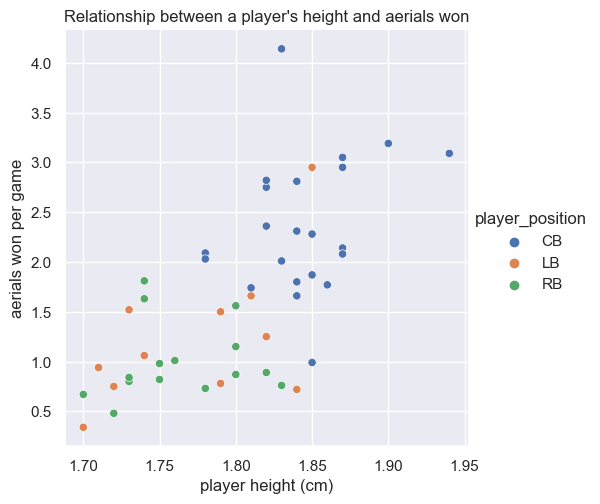

In [81]:
#plot scatter plot of player_height vs aerials_won
sns.relplot(x='player_height', y='aerials_won_per_game', data=df_height_aerials, hue='player_position')
plt.title("Relationship between a player\'s height and aerials won")
plt.xlabel('player height (cm)')
plt.ylabel('aerials won per game')
plt.show()

As expected, a player's ability in aerial duels is associated with his height, and central backs are in general taller and more involved in aerials duels.

In [61]:
#select the top left back and right back players by number of crosses in any season
cur.execute("WITH lb AS (SELECT p.player_name, ps.crosses, s.season_label \
            FROM player p \
            INNER JOIN player_statistics ps ON p.player_id = ps.player_id \
            INNER JOIN season s ON ps.season_id = s.season_id \
            WHERE p.player_position = 'LB' \
            ORDER BY ps.crosses DESC\
            LIMIT 1), \
            rb AS (SELECT p.player_name, ps.crosses, s.season_label \
            FROM player p \
            INNER JOIN player_statistics ps ON p.player_id = ps.player_id \
            INNER JOIN season s ON ps.season_id = s.season_id \
            WHERE p.player_position = 'RB' \
            ORDER BY ps.crosses DESC\
            LIMIT 1) \
            SELECT player_name, crosses, season_label, 'LB' AS position FROM lb \
            UNION \
            SELECT player_name, crosses, season_label, 'RB' AS position FROM rb \
            ORDER BY season_label, position")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_name,crosses,season_label,position
0,José Ángel,260,2018-2019,LB
1,Jesús Navas,232,2019-2020,RB


My prediction of finding Jesús Navas in there was correct :)

In [62]:
#average age by position group, median, and standard deviation
cur.execute("SELECT CASE WHEN p.player_position IN ('CB', 'LB', 'RB', 'DF') THEN 'DEF' \
            WHEN p.player_position IN ('DM', 'CM', 'AM', 'RM', 'LM', 'MF') THEN 'MID' \
            WHEN p.player_position IN ('LW', 'RW', 'CF', 'ST', 'SS', 'FW') THEN 'FWD' \
            ELSE p.player_position END AS position, \
            AVG(LEFT(s.season_label, 4)::INT - EXTRACT(YEAR FROM p.date_of_birth)) AS age_average, \
            PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY LEFT(s.season_label, 4)::INT - EXTRACT(YEAR FROM p.date_of_birth)) AS median_age, \
            STDDEV(LEFT(s.season_label, 4)::INT - EXTRACT(YEAR FROM p.date_of_birth)) AS age_stddev \
            FROM player p \
            INNER JOIN player_statistics ps ON p.player_id = ps.player_id \
            INNER JOIN season s ON ps.season_id = s.season_id \
            GROUP BY position \
            ORDER BY age_average DESC")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,position,age_average,median_age,age_stddev
0,NaN,None,NaN,None
1,GK,28.0308529945553539,28.0,4.5989080718030842
2,DEF,26.3867924528301887,26.0,4.3880313058050346
3,MID,25.9020755721128260,26.0,4.5844334184840897
4,FWD,25.4091360476663357,25.0,4.3440506333351025


In [63]:
#compare two defensive midfielders, Casemiro and Busquets, in each season (2017-2018 to 2021-2022, the seasons they were in Real Madrid and Barcelona, respectively)
cur.execute("SELECT s.season_label, p.player_name, ps.matches_played, ps.interceptions, ps.tackles_won, ps.fouls_committed, ps.yellow_cards, ps.pass_completed, ps.aerials_won \
            FROM player_statistics ps \
            INNER JOIN player p ON ps.player_id = p.player_id \
            INNER JOIN season s ON ps.season_id = s.season_id \
            WHERE p.player_name IN ('Casemiro', 'Sergio Busquets') \
            AND s.season_label BETWEEN '2017-2018' AND '2021-2022' \
            ORDER BY season_label, player_name")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,player_name,matches_played,interceptions,tackles_won,fouls_committed,yellow_cards,pass_completed,aerials_won
0,2017-2018,Casemiro,30,63,78,59,8,1545,59
1,2017-2018,Sergio Busquets,31,51,48,36,8,2031,51
2,2018-2019,Casemiro,29,41,52,47,7,1431,83
3,2018-2019,Sergio Busquets,35,54,60,38,10,2152,49
4,2019-2020,Casemiro,35,68,60,87,12,1817,100
5,2019-2020,Sergio Busquets,33,44,44,46,9,2317,38
6,2020-2021,Casemiro,34,70,49,55,11,1630,97
7,2020-2021,Sergio Busquets,36,53,35,45,9,2453,40
8,2021-2022,Casemiro,32,38,51,54,11,1695,101
9,2021-2022,Sergio Busquets,36,45,49,53,12,2430,57


In [64]:
#compare two central midfielders, Modric and Iniesta, in 2017-2018 (the season they were in Real Madrid and Barcelona, respectively)
cur.execute("SELECT s.season_label, p.player_name, ps.matches_played, ps.pass_completed, ps.assists, ps.shots_on_target, ps.goals \
            FROM player_statistics ps \
            INNER JOIN player p ON ps.player_id = p.player_id \
            INNER JOIN season s ON ps.season_id = s.season_id \
            WHERE p.player_name IN ('Luka Modric', 'Andrés Iniesta') \
            AND s.season_label = '2017-2018' \
            ORDER BY season_label, player_name")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,player_name,matches_played,pass_completed,assists,shots_on_target,goals
0,2017-2018,Andrés Iniesta,30,1352,2,6,1
1,2017-2018,Luka Modric,26,1394,6,9,1


In [65]:
#compare two central midfielders, Kross and Rakitic, in each season (from 2017-2018 to 2019-2020, the seasons they were in Real Madrid and Barcelona, respectively)
cur.execute("SELECT s.season_label, p.player_name, ps.matches_played, ps.interceptions, ps.tackles_won, ps.pass_completed, ps.assists \
            FROM player_statistics ps \
            INNER JOIN player p ON ps.player_id = p.player_id \
            INNER JOIN season s ON ps.season_id = s.season_id \
            WHERE p.player_name IN ('Toni Kroos', 'Ivan Rakitic') \
            AND s.season_label BETWEEN '2017-2018' AND '2019-2020' \
            ORDER BY season_label, player_name")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,player_name,matches_played,interceptions,tackles_won,pass_completed,assists
0,2017-2018,Ivan Rakitic,35,44,31,2282,5
1,2017-2018,Toni Kroos,27,16,35,1982,7
2,2018-2019,Ivan Rakitic,34,51,24,2344,5
3,2018-2019,Toni Kroos,28,14,35,1980,4
4,2019-2020,Ivan Rakitic,31,15,14,1323,3
5,2019-2020,Toni Kroos,35,23,28,2224,5


In [66]:
#compare BBC (Benzema, Bale, Cristiano) attacking trio to MSN (Messi, Suarez, Neymar) in 2015-2016 season
cur.execute("SELECT t.team_name, COALESCE(p.player_name, 'Total'), SUM(ps.goals) AS total_goals, SUM(ps.assists) AS total_assists, SUM(ps.shots_on_target) AS total_shots_on_target, SUM(ps.shots) AS total_shots \
            FROM player_statistics ps \
            INNER JOIN player p ON ps.player_id = p.player_id \
            INNER JOIN team t ON ps.team_id = t.team_id \
            INNER JOIN season s ON ps.season_id = s.season_id \
            WHERE p.player_name IN ('Karim Benzema', 'Gareth Bale', 'Cristiano Ronaldo', 'Lionel Messi', 'Luis Suárez', 'Neymar') \
            AND s.season_label = '2015-2016' \
            GROUP BY GROUPING SETS ((t.team_name, p.player_name), (t.team_name)) \
            ORDER BY t.team_name, p.player_name")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,team_name,coalesce,total_goals,total_assists,total_shots_on_target,total_shots
0,Barcelona,Lionel Messi,26,14,75,158
1,Barcelona,Luis Suárez,40,17,70,137
2,Barcelona,Neymar,24,10,61,124
3,Barcelona,Total,90,41,206,419
4,Real Madrid,Cristiano Ronaldo,35,9,98,227
5,Real Madrid,Gareth Bale,19,10,36,81
6,Real Madrid,Karim Benzema,24,7,51,98
7,Real Madrid,Total,78,26,185,406


Barcelona trio and Real Madrid trio scored more goals than any other team in La Liga in 2015-2016

In [67]:
#find the most effective penalty tackers in 2015-2016 season
cur.execute("WITH penalty_takers AS ( \
            SELECT p.player_name, \
                ps.penalties_attempted, \
                ps.penalties_scored, \
                ps.penalties_scored::FLOAT/ps.penalties_attempted AS penalty_success_rate \
            FROM player_statistics ps \
            INNER JOIN player p ON ps.player_id = p.player_id \
            INNER JOIN season s ON ps.season_id = s.season_id \
            WHERE s.season_label = '2015-2016' \
            AND ps.penalties_attempted >= 5) \
            SELECT pt.player_name, pt.penalties_attempted, pt.penalties_scored, pt.penalty_success_rate \
            FROM penalty_takers pt \
            ORDER BY pt.penalty_success_rate DESC \
            LIMIT 5")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_name,penalties_attempted,penalties_scored,penalty_success_rate
0,Youssef El-Arabi,7,7,1.000000
1,Jonathan Viera,5,4,0.800000
2,Kévin Gameiro,5,4,0.800000
3,Neymar,7,5,0.714286
4,Cristiano Ronaldo,9,6,0.666667


In [68]:
#select top 3 players with the most goal contributions in 2020-2021 season
cur.execute("SELECT p.player_name, \
                ps.goals + ps.assists AS goal_contributions \
            FROM player_statistics ps \
            INNER JOIN player p ON ps.player_id = p.player_id \
            INNER JOIN season s ON ps.season_id = s.season_id \
            WHERE s.season_label = '2020-2021' \
            ORDER BY goal_contributions DESC \
            LIMIT 3")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_name,goal_contributions
0,Lionel Messi,39
1,Karim Benzema,32
2,Gerard Moreno,30


In [69]:
#select central forward players with the least offsides to goals ratio in 2019-2020 season (players who have more than 10 goals)
cur.execute("SELECT p.player_name, \
                ps.goals, \
                ps.offsides::FLOAT/ps.goals AS offsides_to_goals_ratio \
            FROM player_statistics ps \
            INNER JOIN player p ON ps.player_id = p.player_id \
            INNER JOIN season s ON ps.season_id = s.season_id \
            WHERE s.season_label = '2019-2020' \
            AND p.player_position = 'CF' AND ps.goals > 10 \
            ORDER BY offsides_to_goals_ratio ASC \
            LIMIT 5")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_name,goals,offsides_to_goals_ratio
0,Joselu,11,0.545455
1,Gerard Moreno,18,0.888889
2,Roger Martí,11,0.909091
3,Luis Suárez,16,1.125000
4,Raúl García,15,1.200000


In [70]:
#teams with the largest number of different scorers who scored at least 5 goals each in 2021-2022 season
cur.execute("WITH goals_per_team AS ( \
            SELECT ps.team_id, \
                COUNT(DISTINCT ps.player_id) AS num_of_scorers \
            FROM player_statistics ps \
            INNER JOIN season s ON ps.season_id = s.season_id \
            WHERE s.season_label = '2021-2022' \
            AND ps.goals >= 5 \
            GROUP BY ps.team_id) \
            SELECT t.team_name, \
                gpt.num_of_scorers \
            FROM goals_per_team gpt \
            INNER JOIN team t ON gpt.team_id = t.team_id \
            ORDER BY num_of_scorers DESC \
            LIMIT 5")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,team_name,num_of_scorers
0,Villarreal,6
1,Betis,6
2,Sevilla,5
3,Atlético Madrid,5
4,Valencia,4


In [71]:
#number of players, games, and goals scored by players grouped by country
cur.execute("WITH country_stats AS ( \
            SELECT p.player_country, \
                COUNT(DISTINCT ps.player_id) AS num_of_players, \
                SUM(ps.matches_played) AS num_of_games, \
                SUM(ps.goals) AS num_of_goals \
            FROM player_statistics ps \
            INNER JOIN player p ON ps.player_id = p.player_id \
            GROUP BY p.player_country) \
            SELECT cs.player_country, \
                cs.num_of_players, \
                cs.num_of_games, \
                cs.num_of_goals \
            FROM country_stats cs \
            ORDER BY cs.num_of_players DESC\
            LIMIT 20")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_country,num_of_players,num_of_games,num_of_goals
0,Spain,1169,75537,5957
1,Argentina,155,7930,1066
2,Brazil,95,5752,645
3,Portugal,79,4305,544
4,France,70,4127,651
5,Uruguay,55,3595,483
6,Colombia,33,1508,227
7,Italy,31,814,117
8,Serbia,30,1398,40
9,Ghana,27,1063,110


In [72]:
#Calculate the average number of passes completed per game starting season 2017-2018 (seasons where passing data is available)
cur.execute("WITH team_passes AS ( \
            SELECT t.team_name, \
                s.season_label, \
                ts.passes_completed \
            FROM team_statistics ts \
            INNER JOIN team t ON ts.team_id = t.team_id \
            INNER JOIN season s ON ts.season_id = s.season_id \
            WHERE s.season_label >= '2017-2018') \
            SELECT tp.season_label, \
                SUM(tp.passes_completed)::FLOAT / (20*38) AS avg_passes_completed_per_game \
            FROM team_passes tp \
            GROUP BY tp.season_label \
            ORDER BY tp.season_label ASC")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,avg_passes_completed_per_game
0,2017-2018,375.019737
1,2018-2019,364.844737
2,2019-2020,358.801316
3,2020-2021,371.297368
4,2021-2022,365.646053


There is no remarkable trend.

In [73]:
#Identify the team with the highest pass completion rate in each season starting season 2017-2018
cur.execute("WITH pass_completion AS ( \
            SELECT t.team_name, \
                s.season_label, \
                ts.passes_completed, \
                ts.passes_attempted, \
                (ts.passes_completed::FLOAT / ts.passes_attempted)*100 AS pass_completion_rate \
            FROM team_statistics ts \
            INNER JOIN team t ON ts.team_id = t.team_id \
            INNER JOIN season s ON ts.season_id = s.season_id \
            WHERE s.season_label >= '2017-2018') \
            SELECT pc.season_label, \
                pc.team_name, \
                pc.pass_completion_rate \
            FROM pass_completion pc \
            WHERE pc.pass_completion_rate = ( \
                SELECT MAX(pc2.pass_completion_rate) \
                FROM pass_completion pc2 \
                WHERE pc2.season_label = pc.season_label)")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,team_name,pass_completion_rate
0,2017-2018,Barcelona,86.041181
1,2018-2019,Barcelona,87.156719
2,2019-2020,Barcelona,87.710348
3,2020-2021,Barcelona,88.430216
4,2021-2022,Real Madrid,87.176245


In [74]:
#identify the team with the most yellow cards in each season
cur.execute("WITH yellow_cards AS ( \
            SELECT t.team_name, \
                s.season_label, \
                ts.yellow_cards \
            FROM team_statistics ts \
            INNER JOIN team t ON ts.team_id = t.team_id \
            INNER JOIN season s ON ts.season_id = s.season_id \
            WHERE s.season_label >= '2015-2016') \
            SELECT yc.season_label, \
                yc.team_name, \
                yc.yellow_cards \
            FROM yellow_cards yc \
            WHERE yc.yellow_cards = ( \
                SELECT MAX(yc2.yellow_cards) \
                FROM yellow_cards yc2 \
                WHERE yc2.season_label = yc.season_label)")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,team_name,yellow_cards
0,2015-2016,Granada,141
1,2016-2017,Alavés,117
2,2017-2018,Getafe,130
3,2018-2019,Athletic Club,118
4,2019-2020,Getafe,135
5,2020-2021,Getafe,120
6,2021-2022,Valencia,134


It seems that Getafe players are more aggressive.

In [75]:
#identify the team with the lowest yellow cards in each season
cur.execute("WITH yellow_cards AS ( \
            SELECT t.team_name, \
                s.season_label, \
                ts.yellow_cards \
            FROM team_statistics ts \
            INNER JOIN team t ON ts.team_id = t.team_id \
            INNER JOIN season s ON ts.season_id = s.season_id \
            WHERE s.season_label >= '2015-2016') \
            SELECT yc.season_label, \
                yc.team_name, \
                yc.yellow_cards \
            FROM yellow_cards yc \
            WHERE yc.yellow_cards = ( \
                SELECT MIN(yc2.yellow_cards) \
                FROM yellow_cards yc2 \
                WHERE yc2.season_label = yc.season_label)")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,team_name,yellow_cards
0,2015-2016,Barcelona,67
1,2016-2017,Barcelona,74
2,2017-2018,Real Sociedad,60
3,2018-2019,Barcelona,76
4,2019-2020,Villarreal,78
5,2020-2021,Real Madrid,59
6,2021-2022,Real Madrid,76


In [76]:
#identify the team with the most red cards in each season
cur.execute("WITH red_cards AS ( \
            SELECT t.team_name, \
                s.season_label, \
                ts.red_cards \
            FROM team_statistics ts \
            INNER JOIN team t ON ts.team_id = t.team_id \
            INNER JOIN season s ON ts.season_id = s.season_id \
            WHERE s.season_label >= '2015-2016') \
            SELECT rc.season_label, \
                rc.team_name, \
                rc.red_cards \
            FROM red_cards rc \
            WHERE rc.red_cards = ( \
                SELECT MAX(rc2.red_cards) \
                FROM red_cards rc2 \
                WHERE rc2.season_label = rc.season_label)")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,team_name,red_cards
0,2015-2016,Rayo Vallecano,10
1,2016-2017,Celta Vigo,8
2,2017-2018,Málaga,8
3,2018-2019,Rayo Vallecano,8
4,2019-2020,Betis,9
5,2019-2020,Espanyol,9
6,2020-2021,Alavés,8
7,2020-2021,Betis,8
8,2021-2022,Getafe,8
9,2021-2022,Valencia,8


In [77]:
#find goalkeepers with the highest average number of saves made per match
cur.execute("WITH goalkeepers AS ( \
            SELECT p.player_name, \
                s.season_label, \
                ps.saves, \
                ps.matches_played \
            FROM player_statistics ps \
            INNER JOIN player p ON ps.player_id = p.player_id \
            INNER JOIN season s ON ps.season_id = s.season_id \
            WHERE p.player_position = 'GK' \
            AND matches_played > 20 \
            AND s.season_label >= '2017-2018') \
            SELECT gk.player_name, \
                gk.season_label, \
                (gk.saves::FLOAT / gk.matches_played) AS avg_saves_per_match \
            FROM goalkeepers gk \
            ORDER BY avg_saves_per_match DESC \
            LIMIT 10")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,player_name,season_label,avg_saves_per_match
0,Oier Olazábal,2018-2019,4.714286
1,Aitor Fernández,2019-2020,4.222222
2,Leandro Chichizola,2017-2018,3.962963
3,Yassine Bounou,2018-2019,3.937500
4,Sergio Asenjo,2018-2019,3.875000
5,Neto,2017-2018,3.515152
6,Luís Maximiano,2021-2022,3.457143
7,Pau López,2017-2018,3.275862
8,Jasper Cillessen,2019-2020,3.250000
9,Manolo Reina,2019-2020,3.250000


In [78]:
#identify the team with the most clean sheets (matches where they did not concede a goal) in a given season
cur.execute("WITH clean_sheets AS ( \
            SELECT t.team_name, \
                s.season_label, \
                ts.clean_sheets \
            FROM team_statistics ts \
            INNER JOIN team t ON ts.team_id = t.team_id \
            INNER JOIN season s ON ts.season_id = s.season_id) \
            SELECT cs.season_label, \
                cs.team_name, \
                cs.clean_sheets \
            FROM clean_sheets cs \
            WHERE cs.clean_sheets = ( \
                SELECT MAX(cs2.clean_sheets) \
                FROM clean_sheets cs2 \
                WHERE cs2.season_label = cs.season_label)")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,team_name,clean_sheets
0,2010-2011,Barcelona,19
1,2011-2012,Barcelona,19
2,2012-2013,Atlético Madrid,20
3,2013-2014,Atlético Madrid,20
4,2014-2015,Barcelona,23
5,2015-2016,Atlético Madrid,24
6,2016-2017,Atlético Madrid,20
7,2017-2018,Atlético Madrid,23
8,2018-2019,Atlético Madrid,20
9,2019-2020,Real Madrid,19


Again, a clear superiority for Simeone's team.

In [79]:
#calculate the average number of clean sheets per team in each season
cur.execute("WITH clean_sheets_season AS ( \
            SELECT t.team_name, \
                s.season_label, \
                ts.clean_sheets \
            FROM team_statistics ts \
            INNER JOIN team t ON ts.team_id = t.team_id \
            INNER JOIN season s ON ts.season_id = s.season_id) \
            SELECT cs.season_label, \
                SUM(cs.clean_sheets)::FLOAT / 20 AS avg_clean_sheets \
            FROM clean_sheets_season cs \
            GROUP BY cs.season_label \
            ORDER BY cs.season_label")
df_cs_season = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df_cs_season.columns = column_names
df_cs_season

,season_label,avg_clean_sheets
0,2010-2011,10.80
1,2011-2012,11.00
2,2012-2013,10.10
3,2013-2014,11.65
4,2014-2015,11.60
5,2015-2016,10.70
6,2016-2017,9.70
7,2017-2018,11.55
8,2018-2019,10.55
9,2019-2020,11.20


It seems there is no trend in the number of clean sheets between seasons.

In [80]:
#calculate the average number of goals scored by a team in a given season
cur.execute("WITH goals_season AS ( \
            SELECT t.team_name, \
                s.season_label, \
                ts.goals \
            FROM team_statistics ts \
            INNER JOIN team t ON ts.team_id = t.team_id \
            INNER JOIN season s ON ts.season_id = s.season_id) \
            SELECT gs.season_label, \
                SUM(gs.goals)::FLOAT / 20 AS avg_goals \
            FROM goals_season gs \
            GROUP BY gs.season_label \
            ORDER BY gs.season_label")
df_goals_season = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df_goals_season.columns = column_names
df_goals_season

,season_label,avg_goals
0,2010-2011,50.95
1,2011-2012,51.10
2,2012-2013,53.30
3,2013-2014,50.95
4,2014-2015,49.10
5,2015-2016,50.55
6,2016-2017,54.75
7,2017-2018,49.80
8,2018-2019,47.75
9,2019-2020,46.05


Interestingly, there is a relative decrease in the average number of goals scored by a team in the last seasons.

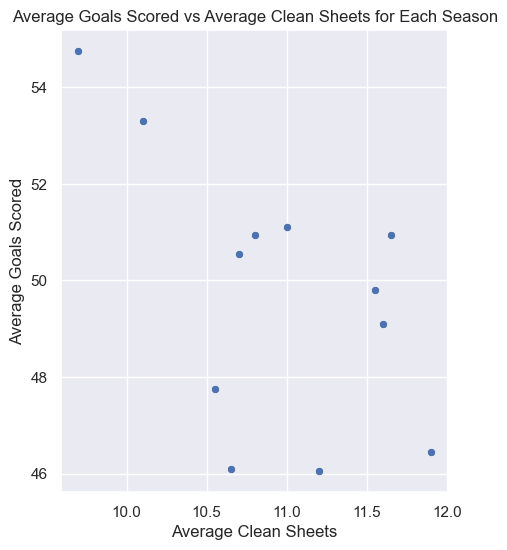

In [84]:
#plot a scatter plot of goals scored vs clean sheets
sns.scatterplot(x='avg_clean_sheets', y='avg_goals', data=df_cs_season.merge(df_goals_season, on='season_label'))
plt.title('Average Goals Scored vs Average Clean Sheets for Each Season')
plt.xlabel('Average Clean Sheets')
plt.ylabel('Average Goals Scored')
plt.show()

It is logical to find that a higher average of goals scored is associated with less average of matches with clean sheets. However, the relationship is not always valid.

In [33]:
#calculate the correlation coefficient
print('Correlation coefficient: ', round(df_cs_season['avg_clean_sheets'].corr(df_goals_season['avg_goals']), 2))

Correlation coefficient:  -0.55


In [81]:
#Calculate the average number of fouls committed per match for each season
cur.execute("WITH fouls_season AS ( \
            SELECT t.team_name, \
                s.season_label, \
                ts.fouls_committed \
            FROM team_statistics ts \
            INNER JOIN team t ON ts.team_id = t.team_id \
            INNER JOIN season s ON ts.season_id = s.season_id \
            WHERE s.season_label >= '2017-2018') \
            SELECT fs.season_label, \
                SUM(fs.fouls_committed)::FLOAT / 380 AS avg_fouls_committed \
            FROM fouls_season fs \
            GROUP BY fs.season_label \
            ORDER BY fs.season_label")
df_fouls_season = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df_fouls_season.columns = column_names
df_fouls_season

,season_label,avg_fouls_committed
0,2017-2018,27.713158
1,2018-2019,27.121053
2,2019-2020,27.486842
3,2020-2021,26.497368
4,2021-2022,26.476316


In [82]:
#identify the team with the highest conversion rate of penalties into goals for each season
cur.execute("WITH penalties_season AS ( \
            SELECT t.team_name, \
                s.season_label, \
                ts.penalties_attempted, \
                ts.penalties_scored, \
                ts.penalties_scored::FLOAT / ts.penalties_attempted AS penalty_conversion_rate \
            FROM team_statistics ts \
            INNER JOIN team t ON ts.team_id = t.team_id \
            INNER JOIN season s ON ts.season_id = s.season_id \
            WHERE s.season_label >= '2014-2015' \
            AND ts.penalties_attempted > 5) \
            SELECT ps.season_label, \
                ps.team_name, \
                ps.penalties_attempted, \
                ps.penalty_conversion_rate \
            FROM penalties_season ps \
            WHERE ps.penalty_conversion_rate = ( \
                SELECT MAX(ps2.penalty_conversion_rate) \
                FROM penalties_season ps2 \
                WHERE ps2.season_label = ps.season_label) \
            ORDER BY ps.season_label, ps.penalties_attempted DESC")
df = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df.columns = column_names
df

,season_label,team_name,penalties_attempted,penalty_conversion_rate
0,2014-2015,Granada,6,1.0
1,2015-2016,Granada,7,1.0
2,2016-2017,Athletic Club,8,1.0
3,2016-2017,Celta Vigo,7,1.0
4,2016-2017,Las Palmas,6,1.0
5,2017-2018,Valencia,8,1.0
6,2018-2019,Real Madrid,9,1.0
7,2018-2019,Celta Vigo,7,1.0
8,2018-2019,Girona,6,1.0
9,2018-2019,Getafe,6,1.0


In [83]:
#calculate the average number of passes made per match for each team
cur.execute("WITH passes_season AS ( \
            SELECT t.team_name, \
                s.season_label, \
                ts.passes_completed \
            FROM team_statistics ts \
            INNER JOIN team t ON ts.team_id = t.team_id \
            INNER JOIN season s ON ts.season_id = s.season_id \
            WHERE s.season_label >= '2017-2018') \
            SELECT ps.team_name, \
                SUM(ps.passes_completed)::FLOAT / (COUNT(ps.team_name)*38) AS avg_passes \
            FROM passes_season ps \
            GROUP BY ps.team_name \
            ORDER BY avg_passes DESC")
df_avg_passes = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df_avg_passes.columns = column_names
df_avg_passes

,team_name,avg_passes
0,Barcelona,614.994737
1,Real Madrid,545.847368
2,Sevilla,452.742105
3,Betis,447.694737
4,Villarreal,416.621053
5,Las Palmas,416.421053
6,Real Sociedad,409.710526
7,Celta Vigo,408.794737
8,Atlético Madrid,393.973684
9,Elche,347.750000


In [84]:
#calculate the average number of points for each team
cur.execute("WITH points_home AS ( \
            SELECT t.team_name, \
                s.season_label, \
                SUM(CASE WHEN m.home_team_score > m.away_team_score THEN 3 \
                    WHEN m.home_team_score = m.away_team_score THEN 1 \
                    ELSE 0 END) AS points \
            FROM match m \
            INNER JOIN team t ON m.home_team_id = t.team_id \
            INNER JOIN season s ON m.season_id = s.season_id \
            GROUP BY t.team_name, s.season_label), \
            points_away AS ( \
            SELECT t.team_name, \
                s.season_label, \
                SUM(CASE WHEN m.home_team_score < m.away_team_score THEN 3 \
                    WHEN m.home_team_score = m.away_team_score THEN 1 \
                    ELSE 0 END) AS points \
            FROM match m \
            INNER JOIN team t ON m.away_team_id = t.team_id \
            INNER JOIN season s ON m.season_id = s.season_id \
            GROUP BY t.team_name, s.season_label) \
            SELECT ph.team_name, \
                (SUM(ph.points) + SUM(pa.points))::FLOAT / COUNT(s.season_label) AS avg_points \
            FROM points_home ph \
            INNER JOIN points_away pa ON ph.team_name = pa.team_name \
            INNER JOIN season s ON ph.season_label = s.season_label \
            GROUP BY ph.team_name \
            ORDER BY avg_points DESC")
df_points = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df_points.columns = column_names
df_points

,team_name,avg_points
0,Barcelona,88.583333
1,Real Madrid,86.666667
2,Atlético Madrid,75.500000
3,Sevilla,62.916667
4,Villarreal,57.727273
5,Valencia,57.583333
6,Real Sociedad,54.500000
7,Athletic Club,54.166667
8,Betis,48.900000
9,Celta Vigo,46.800000


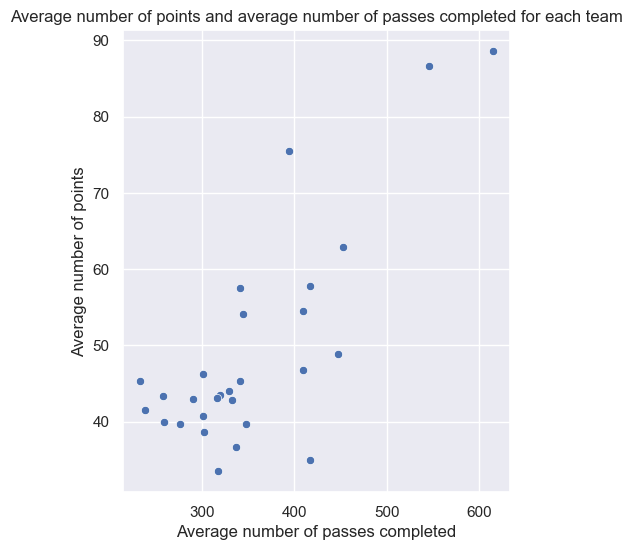

In [88]:
#plot a scatter plot of the average number of points and average number of passes completed for each team
sns.scatterplot(x='avg_passes', y='avg_points', data=df_avg_passes.merge(df_points, on='team_name'))
plt.title('Average number of points and average number of passes completed for each team')
plt.xlabel('Average number of passes completed')
plt.ylabel('Average number of points')
plt.show()

We may conclude that teams that possess the ball more often are not necessarily the closest to win.

In [60]:
#calculate the correlation between the average number of points and average number of passes completed for each team
df_avg_passes_points = df_avg_passes.merge(df_points, on='team_name')
print('Correlation between average number of points and average number of passes completed for each team: ', round(df_avg_passes_points['avg_passes'].corr(df_avg_passes_points['avg_points']),2))

Correlation between average number of points and average number of passes completed for each team:  0.78


In [85]:
#select for each shooting average distance bin the team with most seasons with shooting average distance inside that bin
cur.execute("WITH shot_avg_distance AS ( \
            SELECT t.team_name, \
                s.season_label, \
                ts.shot_avg_distance \
            FROM team_statistics ts \
            INNER JOIN team t ON ts.team_id = t.team_id \
            INNER JOIN season s ON ts.season_id = s.season_id \
            WHERE s.season_label >= '2017-2018'), \
            shot_avg_distance_bins AS ( \
            SELECT sad.team_name, \
                sad.season_label, \
                CASE WHEN sad.shot_avg_distance < 9 THEN '0-9' \
                    WHEN sad.shot_avg_distance >= 9 AND sad.shot_avg_distance < 12 THEN '9-12' \
                    WHEN sad.shot_avg_distance >= 12 AND sad.shot_avg_distance < 15 THEN '12-15' \
                    WHEN sad.shot_avg_distance >= 15 AND sad.shot_avg_distance < 18 THEN '15-18' \
                    WHEN sad.shot_avg_distance >= 18 AND sad.shot_avg_distance < 21 THEN '18-21' \
                    WHEN sad.shot_avg_distance >= 21 AND sad.shot_avg_distance < 24 THEN '21-24' \
                    ELSE '24+' END AS shot_avg_distance_bins \
            FROM shot_avg_distance sad) \
            SELECT sadb.shot_avg_distance_bins, \
                sadb.team_name, \
                COUNT(sadb.season_label) AS num_seasons \
            FROM shot_avg_distance_bins sadb \
            GROUP BY sadb.shot_avg_distance_bins, sadb.team_name \
            ORDER BY sadb.shot_avg_distance_bins, num_seasons DESC")
df_shot_avg_distance = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df_shot_avg_distance.columns = column_names
df_shot_avg_distance

,shot_avg_distance_bins,team_name,num_seasons
0,12-15,Villarreal,1
1,12-15,Athletic Club,1
2,15-18,Real Madrid,5
3,15-18,Real Sociedad,5
4,15-18,Levante,5
5,15-18,Sevilla,5
6,15-18,Betis,5
7,15-18,Alavés,5
8,15-18,Celta Vigo,5
9,15-18,Barcelona,5


In general, teams of the top of the table have a lower average. It may be due to their skill and ability to penetrate more easily opponents' defensive lines.

In [86]:
#calculate for each bin of 3 for shot_avg_distance (from 9 to +24) the average number of teams in each season
cur.execute("WITH shot_avg_distance AS ( \
            SELECT t.team_name, \
                s.season_label, \
                ts.shot_avg_distance \
            FROM team_statistics ts \
            INNER JOIN team t ON ts.team_id = t.team_id \
            INNER JOIN season s ON ts.season_id = s.season_id \
            WHERE s.season_label >= '2017-2018'), \
            shot_avg_distance_bins AS ( \
            SELECT sad.team_name, \
                sad.season_label, \
                CASE WHEN sad.shot_avg_distance < 9 THEN '0-9' \
                    WHEN sad.shot_avg_distance >= 9 AND sad.shot_avg_distance < 12 THEN '9-12' \
                    WHEN sad.shot_avg_distance >= 12 AND sad.shot_avg_distance < 15 THEN '12-15' \
                    WHEN sad.shot_avg_distance >= 15 AND sad.shot_avg_distance < 18 THEN '15-18' \
                    WHEN sad.shot_avg_distance >= 18 AND sad.shot_avg_distance < 21 THEN '18-21' \
                    WHEN sad.shot_avg_distance >= 21 AND sad.shot_avg_distance < 24 THEN '21-24' \
                    ELSE '24+' END AS shot_avg_distance_bins \
            FROM shot_avg_distance sad) \
            SELECT sadb.shot_avg_distance_bins, \
                COUNT(sadb.team_name)::FLOAT / COUNT(DISTINCT sadb.season_label) AS avg_num_teams \
            FROM shot_avg_distance_bins sadb \
            GROUP BY sadb.shot_avg_distance_bins \
            ORDER BY sadb.shot_avg_distance_bins")
df_shot_avg_distance_bins = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df_shot_avg_distance_bins.columns = column_names
df_shot_avg_distance_bins

,shot_avg_distance_bins,avg_num_teams
0,12-15,1.0
1,15-18,18.8
2,18-21,1.0


The vast majority of shots is in 15-18 meters from the goal. Let us explore the results in more detail.

In [87]:
#calculate for each shot_avg_distance the average number of teams in each season
cur.execute("WITH shot_avg_distance AS ( \
            SELECT t.team_name, \
                s.season_label, \
                ts.shot_avg_distance \
            FROM team_statistics ts \
            INNER JOIN team t ON ts.team_id = t.team_id \
            INNER JOIN season s ON ts.season_id = s.season_id \
            WHERE s.season_label >= '2017-2018') \
            SELECT sad.shot_avg_distance, \
                COUNT(sad.team_name)::FLOAT / COUNT(DISTINCT sad.season_label) AS avg_num_teams \
            FROM shot_avg_distance sad \
            GROUP BY sad.shot_avg_distance \
            ORDER BY sad.shot_avg_distance")
df_shot_avg_distance = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df_shot_avg_distance.columns = column_names
df_shot_avg_distance

,shot_avg_distance,avg_num_teams
0,14,1.0
1,15,5.2
2,16,7.8
3,17,5.8
4,18,1.0


The average number of teams in each seasons by average shooting distance distribution is close to a bell shape centered around 16 meters from the goal.

# 4. Regression analysis

In this regression analysis, we try to predict forward players market value in a given season using attacking statistics, minutes played, and the market value of the given player in the previous season.

In [88]:
#select for each season goals, assists, shots_on_target, minutes_played, and market_value (filter for attackers positions CF SS RW and LW)
cur.execute("SELECT ps.player_id, \
                s.season_label, \
                ps.goals, \
                ps.assists, \
                ps.shots_on_target, \
                ps.minutes_played, \
                ps.market_value, \
                LEAD(ps.market_value, 1) OVER (PARTITION BY ps.player_id ORDER BY s.season_label) AS market_value_next_season \
            FROM player_statistics ps \
            INNER JOIN season s ON ps.season_id = s.season_id \
            INNER JOIN player p ON ps.player_id = p.player_id \
            WHERE s.season_label >= '2017-2018' \
                AND p.player_position IN ('CF', 'SS', 'RW', 'LW') \
            ORDER BY ps.player_id, s.season_label")
df_attack_value = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df_attack_value.columns = column_names
df_attack_value.head(7)

,player_id,season_label,goals,assists,shots_on_target,minutes_played,market_value,market_value_next_season
0,9,2017-2018,9,1,25,2152,1000000,1000000.0
1,9,2018-2019,2,0,7,943,1000000,0.0
2,9,2019-2020,1,0,3,208,0,NaN
3,12,2017-2018,0,0,2,232,1000000,NaN
4,13,2021-2022,1,0,1,151,0,NaN
5,67,2017-2018,5,10,15,2150,40000000,40000000.0
6,67,2018-2019,21,6,41,2953,40000000,32000000.0


In [89]:
#delete rows where market_value_next_season is null or 0
df_attack_val = df_attack_value.dropna()
df_attack_val = df_attack_val[df_attack_val['market_value_next_season'] != 0]
df_attack_val.head(7)

,player_id,season_label,goals,assists,shots_on_target,minutes_played,market_value,market_value_next_season
0,9,2017-2018,9,1,25,2152,1000000,1000000.0
5,67,2017-2018,5,10,15,2150,40000000,40000000.0
6,67,2018-2019,21,6,41,2953,40000000,32000000.0
7,67,2019-2020,21,8,54,3141,32000000,25000000.0
8,67,2020-2021,23,9,50,2894,25000000,30000000.0
11,129,2017-2018,3,3,11,1041,60000000,25000000.0
12,129,2018-2019,2,2,10,1112,25000000,14500000.0


Linear Regression MAE: 4466424.86
Linear Regression MSE: 70136548766272.07
Linear Regression R2: 0.78
Random Forest MAE: 5214331.63
Random Forest MSE: 114570300752551.02
Random Forest R2: 0.64
Variables:  Index(['goals', 'assists', 'shots_on_target', 'minutes_played',
       'market_value'],
      dtype='object')
Linear Regression Coefficients:  [ 3290428.91543179   422676.93827724 -3651351.66091323   681448.12280238
 17234195.50269182]
Random Forest Regression Coefficients:  [0.025056   0.02479224 0.0365374  0.04045364 0.87316072]


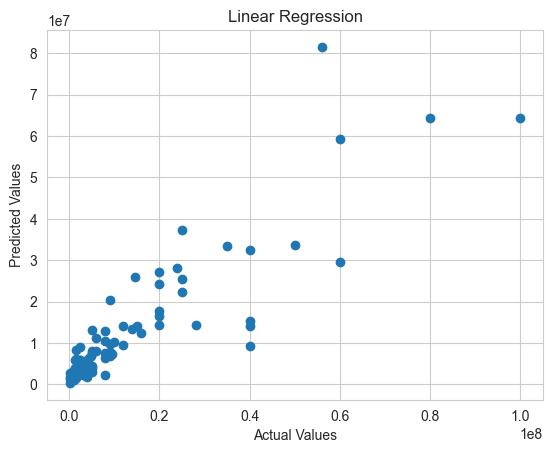

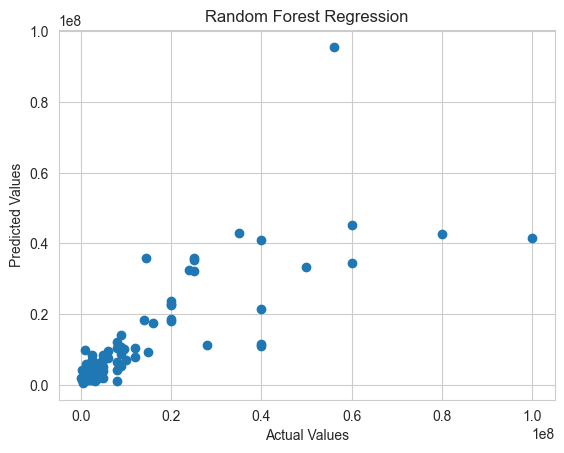

In [90]:
#perform regression

#import necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#select the dependent and independent variables
dep_var = 'market_value_next_season'
indep_vars = ['goals', 'assists', 'shots_on_target', 'minutes_played', 'market_value']
#define the independent and dependent variables
X = df_attack_val[indep_vars]
y = df_attack_val[dep_var]
#set the test size for the train-test split
test_size = 0.2
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
#Linear regression pipeline
scaler = StandardScaler()
lr = LinearRegression()
lr_pipeline = Pipeline([('scaler', scaler), ('model', lr)])
#Random forest regression pipeline
rf = RandomForestRegressor()
rf_pipeline = Pipeline([('scaler', scaler), ('model', rf)])
#fit the models on the training data
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
#make predictions on the test data
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)
#calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
#print evaluation metrics
print(f'Linear Regression MAE: {mae_lr:.2f}')
print(f'Linear Regression MSE: {mse_lr:.2f}')
print(f'Linear Regression R2: {r2_lr:.2f}')
print(f'Random Forest MAE: {mae_rf:.2f}')
print(f'Random Forest MSE: {mse_rf:.2f}')
print(f'Random Forest R2: {r2_rf:.2f}')
#print the coefficients of the variables
print('Variables: ', X.columns)
print("Linear Regression Coefficients: ", lr_pipeline.named_steps['model'].coef_)
print("Random Forest Regression Coefficients: ", rf_pipeline.named_steps['model'].feature_importances_)
#plot the predicted vs. actual values for Linear Regression
plt.scatter(y_test, y_pred_lr)
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
#plot the predicted vs. actual values for Random Forest Regression
plt.scatter(y_test, y_pred_rf)
plt.title('Random Forest Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [91]:
#use the trained linear regression model to predict market value in next season for some players
vini_jr_21 = [[17, 10, 42, 2690, 100000000]]
rodrygo_21 = [[4, 4, 15, 1523, 60000000]]
dembele_21 = [[1, 13, 9, 1409, 30000000]]
benz_21 = [[27, 12, 40, 2593, 30000000]]
vini_jr_22 = lr_pipeline.predict(vini_jr_21)
rodrygo_22 = lr_pipeline.predict(rodrygo_21)
dembele_22 = lr_pipeline.predict(dembele_21)
benz_22 = lr_pipeline.predict(benz_21)
#print predicted values to the closest ten thousand
print('Predicted market value for Vinicius Junior in 2022-23: ', round(vini_jr_22[0], -4))
print('Predicted market value for Rodrygo in 2022-23: ', round(rodrygo_22[0], -4))
print('Predicted market value for Ousmane Dembele in 2022-23: ', round(dembele_22[0], -4))
print('Predicted market value for Karim Benzema in 2022-23: ', round(benz_22[0], -4))

Predicted market value for Vinicius Junior in 2022-23:  80890000.0
Predicted market value for Rodrygo in 2022-23:  47960000.0
Predicted market value for Ousmane Dembele in 2022-23:  25840000.0
Predicted market value for Karim Benzema in 2022-23:  33110000.0


The model predicted a decrease in market value for Vinicius Junior and Rodrygo and an increase in value for Benzema. Regarding the actual values for this season (120m€, 80m€, and 35m€, for the three, respectively), the only correct prediction is the one of Benzema. It may seem that the model is unreliable because it does not consider an essential element in estimating a player's value that we ignored, which is a player's age. Let us do the analysis another time, this time considering age as well (another variable that may be important in determining the market value is the remaining time in a player's current contract, but we will not consider this variable in our analysis).

In [93]:
#rewrite the query to include player's age at the starting of the season (first 4 digits of season label)
cur.execute("SELECT ps.player_id, \
                s.season_label, \
                ps.goals, \
                ps.assists, \
                ps.shots_on_target, \
                ps.minutes_played, \
                ps.market_value, \
                LEAD(ps.market_value, 1) OVER (PARTITION BY ps.player_id ORDER BY s.season_label) AS market_value_next_season, \
                to_date(LEFT(s.season_label, 4), 'YYYY') - p.date_of_birth AS age_in_days \
            FROM player_statistics ps \
            INNER JOIN season s ON ps.season_id = s.season_id \
            INNER JOIN player p ON ps.player_id = p.player_id \
            WHERE s.season_label >= '2017-2018' \
                AND p.player_position IN ('CF', 'SS', 'RW', 'LW') \
            ORDER BY ps.player_id, s.season_label")
df_attack_value2 = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df_attack_value2.columns = column_names
df_attack_value2.head(7)

,player_id,season_label,goals,assists,shots_on_target,minutes_played,market_value,market_value_next_season,age_in_days
0,9,2017-2018,9,1,25,2152,1000000,1000000.0,13108
1,9,2018-2019,2,0,7,943,1000000,0.0,13473
2,9,2019-2020,1,0,3,208,0,NaN,13838
3,12,2017-2018,0,0,2,232,1000000,NaN,10904
4,13,2021-2022,1,0,1,151,0,NaN,11901
5,67,2017-2018,5,10,15,2150,40000000,40000000.0,10606
6,67,2018-2019,21,6,41,2953,40000000,32000000.0,10971


In [94]:
#delete rows where market_value_next_season is null or 0
df_attack_val2 = df_attack_value2.dropna()
df_attack_val2 = df_attack_val2[df_attack_val2['market_value_next_season'] != 0]

Linear Regression MAE: 4512583.16
Linear Regression MSE: 64757002461512.51
Linear Regression R2: 0.80
Random Forest MAE: 4813005.10
Random Forest MSE: 87992814905612.25
Random Forest R2: 0.72
Variables:  Index(['goals', 'assists', 'shots_on_target', 'minutes_played', 'market_value',
       'age_in_days'],
      dtype='object')
Linear Regression Coefficients:  [ 4284539.78605276   946157.39516476 -4157858.61240979   938393.44290762
 16552242.47125155 -2683498.80779529]
Random Forest Regression Coefficients:  [0.0190266  0.01723686 0.02310937 0.02283315 0.86516238 0.05263163]


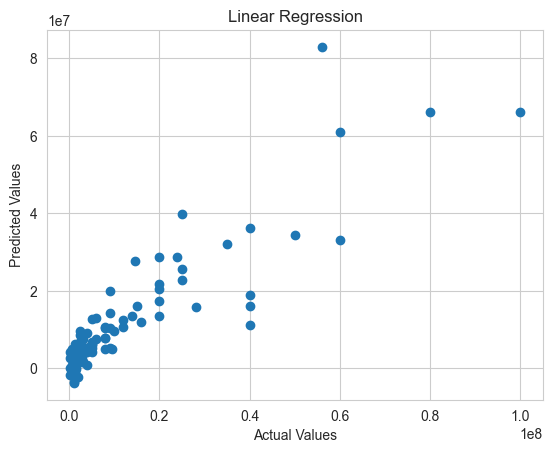

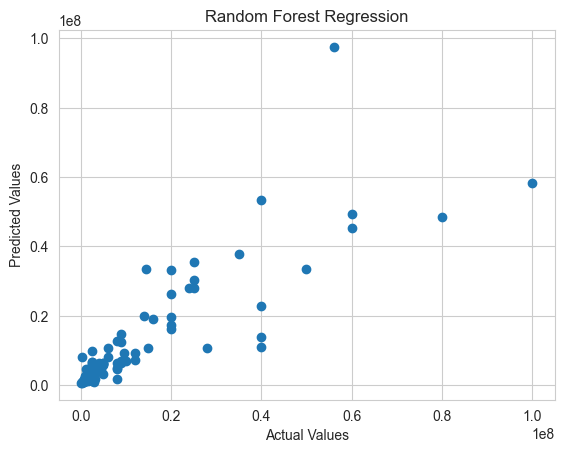

In [95]:
#select the dependent and independent variables
dep_var2 = 'market_value_next_season'
indep_vars2 = ['goals', 'assists', 'shots_on_target', 'minutes_played', 'market_value', 'age_in_days']
X2 = df_attack_val2[indep_vars2]
y2 = df_attack_val2[dep_var2]
#set the test size for the train-test split
test_size = 0.2
#split the data into training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=test_size, random_state=42)
#Linear regression pipeline
scaler = StandardScaler()
lr = LinearRegression()
lr2_pipeline = Pipeline([('scaler', scaler), ('model', lr)])
#Random forest regression model
rf = RandomForestRegressor()
rf2_pipeline = Pipeline([('scaler', scaler), ('model', rf)])
#fit the models on the training data
lr2_pipeline.fit(X2_train, y2_train)
rf2_pipeline.fit(X2_train, y2_train)
#make predictions on the test data
y_pred_lr2 = lr2_pipeline.predict(X2_test)
y_pred_rf2 = rf2_pipeline.predict(X2_test)
#calculate evaluation metrics
mae_lr2 = mean_absolute_error(y2_test, y_pred_lr2)
mse_lr2 = mean_squared_error(y2_test, y_pred_lr2)
r2_lr2 = r2_score(y2_test, y_pred_lr2)
mae_rf2 = mean_absolute_error(y2_test, y_pred_rf2)
mse_rf2 = mean_squared_error(y2_test, y_pred_rf2)
r2_rf2 = r2_score(y2_test, y_pred_rf2)
#print evaluation metrics
print(f'Linear Regression MAE: {mae_lr2:.2f}')
print(f'Linear Regression MSE: {mse_lr2:.2f}')
print(f'Linear Regression R2: {r2_lr2:.2f}')
print(f'Random Forest MAE: {mae_rf2:.2f}')
print(f'Random Forest MSE: {mse_rf2:.2f}')
print(f'Random Forest R2: {r2_rf2:.2f}')
#print the coefficients of explanatory variables
print('Variables: ', X2.columns)
print("Linear Regression Coefficients: ", lr2_pipeline.named_steps['model'].coef_)
print("Random Forest Regression Coefficients: ", rf2_pipeline.named_steps['model'].feature_importances_)
#plot the predicted vs. actual values for Linear Regression
plt.scatter(y2_test, y_pred_lr2)
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
#plot the predicted vs. actual values for Random Forest Regression
plt.scatter(y2_test, y_pred_rf2)
plt.title('Random Forest Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [96]:
#use the trained linear regression model to predict market value in next season for some players
vini_jr_21 = [[17, 10, 42, 2690, 100000000, 7843]]
rodrygo_21 = [[4, 4, 15, 1523, 60000000, 7662]]
dembele_21 = [[1, 13, 9, 1409, 30000000, 8997]]
benz_21 = [[27, 12, 40, 2593, 30000000, 12432]]
vini_jr2_22 = lr2_pipeline.predict(vini_jr_21)
rodrygo2_22 = lr2_pipeline.predict(rodrygo_21)
dembele2_22 = lr2_pipeline.predict(dembele_21)
benz2_22 = lr2_pipeline.predict(benz_21)
#print predicted values to the closest ten thousand
print('New predicted market value for Vinicius Junior in 2022-23: ', round(vini_jr2_22[0], -4))
print('New predicted market value for Rodrygo in 2022-23: ', round(rodrygo2_22[0], -4))
print('New predicted market value for Ousmane Dembele in 2022-23: ', round(dembele2_22[0], -4))
print('New predicted market value for Karim Benzema in 2022-23: ', round(benz2_22[0], -4))

New predicted market value for Vinicius Junior in 2022-23:  83600000.0
New predicted market value for Rodrygo in 2022-23:  49450000.0
New predicted market value for Ousmane Dembele in 2022-23:  27440000.0
New predicted market value for Karim Benzema in 2022-23:  32540000.0


The models' performance improved regarding evaluation metrics, but the examples we have chosen for prediction do not reflect this improvement. The shortcoming may not only be due to the model's performance but also to the choice of players we made (Vinicius and Rodrygo, being at the beginning of their careers, made a great 2021-2022 season that positively impacted their market value. Dembele, with his consecutive injuries, didn't start the season well, but after coming from injury finished the season very well,which perhaps helped rise again his market value). The scatter plot may also suggest that the model could be less accurate in predicting the next season's market values for players with high market values. We leave the job of finding the most relevant independent variables and best model to the user of the app we try to build and deploy in the following section.

# 5. Regression Web App

In this final section, we will create and deploy a simple web app that allows playing with variables to determine the most relevant ones in predicting the market value of a player in the upcoming season.

We proceed as the following:
1. We create three data frames for goalkeepers, defenders, and midfielders, in addition to the attackers' data frame we already have. Each data frame has explanatory variables relevant to the player's position. We use the data frames as inputs to the app.
2. The user chooses a player's position. Following the position the user chooses, one of the four data frames is considered.
3. The user chooses from the corresponding explanatory variables the ones he wants to include in the model.
4. The user chooses a regression algorithm to apply (Linear regression, Gradient Boosting, or Random Forest).
5. The algorithm runs with the chosen variables and regressor.
6. Evaluation metrics are then calculated and shown, and plots showing the relationship between the dependent and independent variables are also shown.

In [97]:
#write the query for df_goalkeeper_value
cur.execute("SELECT ps.player_id, \
                s.season_label, \
                ps.goals_against, \
                ps.saves, \
                ps.clean_sheets, \
                ps.penalties_saved, \
                ps.minutes_played, \
                ps.market_value, \
                LEAD(ps.market_value, 1) OVER (PARTITION BY ps.player_id ORDER BY s.season_label) AS market_value_next_season, \
                to_date(LEFT(s.season_label, 4), 'YYYY') - p.date_of_birth AS age_ind_days \
            FROM player_statistics ps \
            INNER JOIN season s ON ps.season_id = s.season_id \
            INNER JOIN player p ON ps.player_id = p.player_id \
            WHERE s.season_label >= '2017-2018' \
                AND p.player_position IN ('GK') \
            ORDER BY ps.player_id, s.season_label")
df_goalkeeper_value = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df_goalkeeper_value.columns = column_names
df_goalkeeper_value.head(7)

,player_id,season_label,goals_against,saves,clean_sheets,penalties_saved,minutes_played,market_value,market_value_next_season,age_ind_days
0,6,2017-2018,53,79,9,1,2700,5000000,1500000.0,10826
1,6,2018-2019,0,0,0,0,90,1500000,800000.0,11191
2,6,2019-2020,0,0,0,0,25,800000,NaN,11556
3,28,2017-2018,0,0,0,0,1476,2000000,2000000.0,11109
4,28,2018-2019,0,0,0,0,1170,2000000,2000000.0,11474
5,28,2018-2019,0,0,0,0,1069,2000000,1200000.0,11474
6,28,2019-2020,0,0,0,0,1147,1200000,1200000.0,11839


In [98]:
#write the query for df_defender_value
cur.execute("SELECT ps.player_id, \
                s.season_label, \
                ps.tackles_won, \
                ps.blocks, \
                ps.interceptions, \
                ps.aerials_won, \
                ps.pass_completed, \
                ps.minutes_played, \
                ps.market_value, \
                LEAD(ps.market_value, 1) OVER (PARTITION BY ps.player_id ORDER BY s.season_label) AS market_value_next_season, \
                to_date(LEFT(s.season_label, 4), 'YYYY') - p.date_of_birth AS age_ind_days \
            FROM player_statistics ps \
            INNER JOIN season s ON ps.season_id = s.season_id \
            INNER JOIN player p ON ps.player_id = p.player_id \
            WHERE s.season_label >= '2017-2018' \
                AND p.player_position IN ('CB', 'RB', 'LB') \
            ORDER BY ps.player_id, s.season_label")
df_defender_value = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df_defender_value.columns = column_names
df_defender_value.head(7)

,player_id,season_label,tackles_won,blocks,interceptions,aerials_won,pass_completed,minutes_played,market_value,market_value_next_season,age_ind_days
0,15,2017-2018,42,34,68,15,2074,2744,60000000,50000000.0,10148
1,15,2018-2019,22,24,60,16,2279,2991,50000000,40000000.0,10513
2,15,2019-2020,13,12,37,6,1858,2187,40000000,20000000.0,10878
3,15,2020-2021,30,21,49,4,2479,3025,20000000,9000000.0,11243
4,15,2021-2022,34,26,33,13,2334,2644,9000000,NaN,11609
5,19,2019-2020,23,29,42,74,1635,3237,3200000,2500000.0,12172
6,19,2020-2021,15,32,22,65,1829,3115,2500000,3000000.0,12537


In [99]:
#write the query for df_midfielder_value
cur.execute("SELECT ps.player_id, \
                s.season_label, \
                ps.pass_completed, \
                ps.tackles_won, \
                ps.interceptions, \
                ps.assists, \
                ps.goals, \
                ps.minutes_played, \
                ps.market_value, \
                LEAD(ps.market_value, 1) OVER (PARTITION BY ps.player_id ORDER BY s.season_label) AS market_value_next_season, \
                to_date(LEFT(s.season_label, 4), 'YYYY') - p.date_of_birth AS age_ind_days \
            FROM player_statistics ps \
            INNER JOIN season s ON ps.season_id = s.season_id \
            INNER JOIN player p ON ps.player_id = p.player_id \
            WHERE s.season_label >= '2017-2018' \
                AND p.player_position IN ('DM', 'CM', 'LM', 'RM', 'AM') \
            ORDER BY ps.player_id, s.season_label")
df_midfielder_value = pd.DataFrame(cur.fetchall())
column_names = [desc[0] for desc in cur.description]
df_midfielder_value.columns = column_names
df_midfielder_value.head(7)

,player_id,season_label,pass_completed,tackles_won,interceptions,assists,goals,minutes_played,market_value,market_value_next_season,age_ind_days
0,62,2017-2018,1896,53,12,3,3,2399,12000000,15000000.0,10413
1,62,2018-2019,1823,50,28,5,3,2667,15000000,7000000.0,10778
2,62,2019-2020,1959,28,15,7,3,2475,7000000,NaN,11143
3,68,2017-2018,278,22,23,1,4,1463,1500000,800000.0,11199
4,68,2018-2019,13,2,1,0,0,53,800000,0.0,11564
5,68,2019-2020,9,0,0,0,0,72,0,NaN,11929
6,80,2017-2018,2031,48,51,4,1,2593,80000000,50000000.0,10396


In [55]:
#export df_attack_value2, df_goalkeeper_value, df_defender_value, df_midfielder_value to csv files to be used in the app
df_attack_value2.to_csv('position_market_value/df_attack_value2.csv', index=False)
df_goalkeeper_value.to_csv('position_market_value/df_goalkeeper_value.csv', index=False)
df_defender_value.to_csv('position_market_value/df_defender_value.csv', index=False)
df_midfielder_value.to_csv('position_market_value/df_midfielder_value.csv', index=False)

**The code for the app is available at the repository named "Regression_Player_Market_Value"\
The app was deployed to Streamlit and is available at [(Click Here)](https://breathingdata-regression-player-market-va-regression-app-m2uucj.streamlit.app/)**

**These are screenshots from the app:**

![](Images/App_Screen1.png)
![](Images/App_Screen2.png)
![](Images/App_Screen3.png)
![](Images/App_Screen4.png)